# <center> <span style="color:indigo">        Curso de Python y ML</span> </center> 
##  <center> <span style="color:DarkBlue">          Tarea 1. Nombre de la tarea </span>  </center>
##  <center> <span style="color:DarkBlue"> Diego Villanueva Ferreyra</span>  </center>
##  <center> <span style="color:DarkBlue"> 19121092@morelia.tecnm.mx</span>  </center>
##  <center> <span style="color:DarkBlue"> Agosto de 2023</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema</span>
2. <span style="color:DarkBlue">Planteamiento de la solución</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución </span>
4. <span style="color:DarkBlue">Discusión </span>
5. <span style="color:DarkBlue">Referencias</span>


## <span style="color:DarkBlue"> 1. Planteamiento del problema</span>
Utilizando técnicas de búsquedas en Web, localizar estaciones meteorológicas que obtengan datos del clima en la ciudad de Morelia en los últimos 5 años. Las variables que se pueden monotorear son muchas, pero de acuerdo a la Red Universitaria de Observatorios Atmosféricos  (RUOA) de la UNAM se tiene las mediciones de las siguientes: 
1. Meteorología: 
- Temperatura y humedad
- Rápidez y dirección del viento
- Radiación solar
2. Calidad del aire: 
* O3 Ozono
* S02 Dióxido de  Azufre 
* Dióxido de Nitrógeno
* CO Monóxido de Carbono

Para las variables ambientales anteriores obtener:
* Promedio histórico (últimos 5 años)
* Detectar valores atípicos y reportarlos
* Graficar las variables por media, varianza, min, max
* Reportar los hallazgos en gráficas

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Primero se importan todas las librerías que se van a usar para este proyecto


In [3]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

### 2.1 Web scrapping a la página de la Red Universitaria de Observatorios Atmosféricos (RUOA)

Para comenzar, tenemos que realizar web scrapping a la página de la RUOA (https://www.ruoa.unam.mx/). Especificamente, a la estación que se encuentra en Morelia.   
Tendremos que obtener los datos de los últimos 5 años. Para esto hay dos opciones: **Datos obtenidos por hora o por minuto**.    Para este proyecto se optó por los archivos por minuto debido a que puede tenerse más exactitud en cuanto al analisis de datos.  
Por lo que en los siguientes dos codigos se mostrará como se realizó el web scrapping de los datos. Lo que hacen basicamente es obtener todos los archivos que tiene la página y ya descargados, simplemente eliminamos los archivos que no se necesitaron y solo se mantienen los que utilizaremos, siendo estos de Ocutbre de 2018 a Octubre de 2023.  

#### Temperatura

In [ ]:
from bs4 import BeautifulSoup
import requests, os

# URL de la página web que contiene los enlaces
url = 'https://www.ruoa.unam.mx/csv_data/more/hora.php'

# Realiza una solicitud GET a la página web
response = requests.get(url)

# Parsea el HTML con Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra las etiquetas <a> con el atributo 'download'
enlaces = soup.find_all('a', {'download': True})

# Imprime los enlaces de descarga y descarga solo los archivos en el rango de fechas
for enlace in enlaces:
    nombre_archivo = enlace['download']
    url_descarga = enlace['href']

    # Nombre de archivo local donde se guardará el archivo
    descarga = 'https://www.ruoa.unam.mx/csv_data/more/' + url_descarga
    nombre_archivo_local = nombre_archivo
    
    # Obtén la ubicación del directorio del script actual
    directorio_script = os.path.dirname(os.path.realpath(__file__))
    # Construye la ruta completa del archivo
    ruta_completa_archivo = os.path.join(directorio_script, nombre_archivo_local)
    response = requests.get(descarga)
    if response.status_code == 200:
        with open(ruta_completa_archivo, 'wb') as archivo_local:
            archivo_local.write(response.content)
        print("Descarga exitosa. Archivo guardado como", ruta_completa_archivo)
    else:
        print("La descarga falló. Código de respuesta:", response.status_code)

#### Calidad del aire

In [ ]:
from bs4 import BeautifulSoup
import requests, os

# URL de la página web que contiene los enlaces
url = 'https://www.ruoa.unam.mx/caire/more/hora.php'

# Realiza una solicitud GET a la página web
response = requests.get(url)

# Parsea el HTML con Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra las etiquetas <a> con el atributo 'download'
enlaces = soup.find_all('a', {'download': True})

# Imprime los enlaces de descarga
for enlace in enlaces:
    nombre_archivo = enlace['download']
    url_descarga = enlace['href']
    
    # Nombre de archivo local donde se guardará el archivo
    descarga = 'https://www.ruoa.unam.mx/caire/more/' + url_descarga
    nombre_archivo_local = nombre_archivo

    # Obtén la ubicación del directorio del script actual
    directorio_script = os.path.dirname(os.path.realpath(__file__))
    # Construye la ruta completa del archivo
    ruta_completa_archivo = os.path.join(directorio_script, nombre_archivo_local)
    response = requests.get(descarga)
    if response.status_code == 200:
        with open(ruta_completa_archivo, 'wb') as archivo_local:
            archivo_local.write(response.content)
        print("Descarga exitosa. Archivo guardado como", ruta_completa_archivo)
    else:
        print("La descarga falló. Código de respuesta:", response.status_code)

**Cabe recalcar que este codigo no funciona en el ambiente de JupyterLab, sino que se tiene que ejecutar estos como programas de Python para que funcionen.**

### 2.2.- Limpieza de archivos y datos

#### Formateo y estructura de los archivos

Primero se tuvo el problema de la codificación de los archivos CSV junto al formato que estos tenian al principio como se muestran en las siguientes dos celdas:

In [1]:
#CODIFICACIÓN QUE TIENEN LOS ARCHIVOS
with open("aire/2020-11-MORE_minuto_L1_caire.csv") as f:
    print(f)

<_io.TextIOWrapper name='aire/2020-11-MORE_minuto_L1_caire.csv' mode='r' encoding='cp1252'>


In [277]:
#EJEMPLO DE UN ARCHIVO COMO SE DESCARGA AL HACER WEB SCRAPPING Y SIN PROCESAR
data = pd.read_csv("Data2.csv")
data.head(10)

,Red Universitaria de Observatorios Atmosfericos (RUOA),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Atmospheric Observatory Morelia (more),Michoacan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Lat 19.6493 N,Lon 101.2221 W,Alt 1936 masl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Time UTC-6h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Air Quality data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flags: OK = Reliable data,BDL = Below Detection Limit,OR = Out of Range,OS = Out of Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Time,O3,O3_flag,SO2,SO2_flag,NO2,NO2_flag,NO,NO_flag,CO,CO_flag,PM10,PM10_flag,PM2.5,PM2.5_flag
7,yyyy-mm-dd HH:MM:SS,ppb,flag,ppb,flag,ppb,flag,ppb,flag,ppm,flag,ug/m^3,flag,ug/m^3,flag
8,2023-09-01 00:00:00,12.48,OK,NaN,OS,12.6,OK,0.03,BDL,0.33,OK,12.22,OK,-2.78,BDL
9,2023-09-01 00:01:00,11.22,OK,NaN,OS,13.8,OK,0.1,BDL,0.35,OK,12.71,OK,-3.16,BDL


Por lo que para esto, se fueron eliminando manualmente en Microsoft Excel los encabezados y las celdas que no servian al principio de los archivos junto a su codificación que tenian. Y como se muestra a continuación, se mejoró la estructura de los archivos para su manipulación:

In [178]:
data = pd.read_csv("aire/2018-10-MORE_minuto_L1_caire.csv")
data.head(10)

,Time,O3,O3_flag,SO2,SO2_flag,NO2,NO2_flag,NO,NO_flag,CO,CO_flag,PM10,PM10_flag,PM2.5,PM2.5_flag
0,01/10/2018 00:00,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
1,01/10/2018 00:01,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
2,01/10/2018 00:02,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
3,01/10/2018 00:03,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
4,01/10/2018 00:04,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
5,01/10/2018 00:05,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
6,01/10/2018 00:06,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
7,01/10/2018 00:07,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
8,01/10/2018 00:08,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS
9,01/10/2018 00:09,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS,NaN,OS


In [179]:
data = pd.read_csv("temperatura/2018-10-more_minuto_L1.csv")
data.head(10)

,TIMESTAMP,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,WDir_SD,Rain_Tot,Press_Avg,Rad_Avg
0,01/10/2018 00:00,15.33,85.3,1.954,2.304,59.49,5.667,0.0,807.299,-2.028
1,01/10/2018 00:01,15.45,82.1,1.584,1.823,45.71,3.675,0.0,807.265,-2.166
2,01/10/2018 00:02,15.70,82.0,0.874,1.147,32.59,15.430,0.0,807.312,-1.659
3,01/10/2018 00:03,15.82,83.7,0.340,0.717,38.84,7.431,0.0,807.272,-1.383
4,01/10/2018 00:04,15.82,84.5,0.321,0.788,59.90,5.853,0.0,807.319,-0.830
5,01/10/2018 00:05,15.74,81.7,0.514,0.737,72.82,1.895,0.0,807.258,-1.383
6,01/10/2018 00:06,15.74,82.3,0.302,0.532,49.17,1.553,0.0,807.312,-1.383
7,01/10/2018 00:07,15.78,83.3,0.295,0.666,51.18,11.650,0.0,807.231,-1.291
8,01/10/2018 00:08,15.80,82.2,0.700,0.860,57.38,2.758,0.0,807.272,-1.198
9,01/10/2018 00:09,15.78,84.1,0.374,0.625,44.40,2.720,0.0,807.190,-1.198


#### Creación de un solo un archivo para temperatura y calidad del aire

Después de formatear los archivos y tenerlos con la estructura correcta, ahora queda unir todos los datos ya que como están separados por fechas, los hace más complicados de manipular (en mi opinión). Por lo que para esto, simplemente vamos a poner todos los datos de todos los archivos en uno solo; uno para la temperatura y el otro para la calidad del aire.

##### Temperatura

*CUIDADO: SI NO SE TIENE EL ARCHIVO GENERADO, ES RECOMENDABLE QUE SOLO SE EJECUTE LAS SIGUIENTES SENTENCIAS UNA SOLA VEZ, YA QUE SI YA SE TIENE EL ARCHIVO Y SE VUELVE A EJECUTAR, SE AGREGAN LOS MISMOS DATOS OTRA VEZ*

In [8]:
# Directorio que contiene los archivos CSV a combinar
directorio = 'temperatura/'  # Reemplaza 'ruta_a_tu_carpeta' con la ruta de tu carpeta

# Inicializa una lista para almacenar DataFrames individuales
dataframes = []

# Itera a través de los archivos en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'):  # Asegúrate de que solo se procesen archivos CSV
        ruta_completa_archivo = os.path.join(directorio, archivo)
        
        # Lee el archivo CSV y agrega su DataFrame a la lista
        df = pd.read_csv(ruta_completa_archivo)
        dataframes.append(df)

# Combina todos los DataFrames en uno solo
datos_combinados = pd.concat(dataframes, ignore_index=True)

# Guarda los datos combinados en un nuevo archivo CSV
datos_combinados.to_csv('temperatura/temperatura.csv', index=False)

Contamos cuantos registros tiene un solo archivo y luego contamos cuantos registros tiene el archivo con todos los datos y se puede comprobar que, efectivamente, se logró unificar los datos en uno solo.

In [6]:
# Ruta al archivo CSV
archivo_csv = 'temperatura/2018-10-more_minuto_L1.csv'  # Reemplaza 'tu_archivo.csv' con la ruta de tu archivo

# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv(archivo_csv)

# Obtiene el número de registros (filas) en el DataFrame
cantidad_registros = len(df)

print(f"El archivo CSV tiene {cantidad_registros} registros.")


El archivo CSV tiene 44640 registros.


In [7]:
# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv('temperatura/temperatura.csv')

# Obtiene el número de registros (filas) en el DataFrame
cantidad_registros = len(df)

print(f"El archivo CSV tiene {cantidad_registros} registros.")

El archivo CSV tiene 2522228 registros.


##### Calidad del aíre

*CUIDADO: SI NO SE TIENE EL ARCHIVO GENERADO, ES RECOMENDABLE QUE SOLO SE EJECUTE LAS SIGUIENTES SENTENCIAS UNA SOLA VEZ, YA QUE SI YA SE TIENE EL ARCHIVO Y SE VUELVE A EJECUTAR, SE AGREGAN LOS MISMOS DATOS OTRA VEZ*

In [ ]:
# Directorio que contiene los archivos CSV a combinar
directorio = 'aire/'  # Reemplaza 'ruta_a_tu_carpeta' con la ruta de tu carpeta

# Inicializa una lista para almacenar DataFrames individuales
dataframes = []

# Itera a través de los archivos en el directorio
for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'):  # Asegúrate de que solo se procesen archivos CSV
        ruta_completa_archivo = os.path.join(directorio, archivo)
        
        # Lee el archivo CSV y agrega su DataFrame a la lista
        df = pd.read_csv(ruta_completa_archivo)
        dataframes.append(df)

# Combina todos los DataFrames en uno solo
datos_combinados = pd.concat(dataframes, ignore_index=True)

# Guarda los datos combinados en un nuevo archivo CSV
datos_combinados.to_csv('aire/calidad_aire.csv', index=False)

Contamos cuantos registros tiene un solo archivo y luego contamos cuantos registros tiene el archivo con todos los datos y se puede comprobar que, efectivamente, se logró unificar los datos en uno solo.

In [11]:
# Ruta al archivo CSV
archivo_csv = 'aire/2018-10-MORE_minuto_L1_caire.csv'  # Reemplaza 'tu_archivo.csv' con la ruta de tu archivo

# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv(archivo_csv)

# Obtiene el número de registros (filas) en el DataFrame
cantidad_registros = len(df)

print(f"El archivo CSV tiene {cantidad_registros} registros.")


El archivo CSV tiene 44640 registros.


In [12]:
# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv('aire/calidad_aire.csv')

# Obtiene el número de registros (filas) en el DataFrame
cantidad_registros = len(df)

print(f"El archivo CSV tiene {cantidad_registros} registros.")

El archivo CSV tiene 2625009 registros.


#### Limpieza de datos nulos y átipicos

Ahora que ya se termino de formatear los archivos junto a la unificación de todos los archivos en uno solo, falta limpiarlos para comenzar con su analisis. 
Para esto se abren los dos archivos recien creados, y se crearán variables para cada columna que nos interesa realizar el analisis las cuales son:
* Meteorología: a) Temperatura y humedad, b) Rápidez y dirección del viento, c) Radiación solar:
* Calidad del aire: a) O3 Ozono, b) S02 Dióxido de  Azufre, c) Dióxido de Nitrógeno, d) CO Monóxido de Carbono

In [4]:
# Cargar los archivos CSV en DataFrames
datos_meteorologicos = pd.read_csv('temperatura/temperatura.csv')
datos_calidad_aire = pd.read_csv('aire/calidad_aire.csv')

Ya cargados los datasets mediante Pandas, solo queda individualizar las variables que nos interesan para realizar su analisis requerido. Para esto también necesitaremos crear datasets para cada uno de estas para manejarlas de mejor manera.

##### Variables del archivo de Temperatura

**TEMPERATURA**

In [5]:
#TEMPERATURA
temp = datos_meteorologicos.loc[:, ["TIMESTAMP", "Temp_Avg"]]
temp = temp.dropna()
temp.head()

,TIMESTAMP,Temp_Avg
0,01/10/2018 00:00,15.33
1,01/10/2018 00:01,15.45
2,01/10/2018 00:02,15.70
3,01/10/2018 00:03,15.82
4,01/10/2018 00:04,15.82


**HUMEDAD RELATIVA**

In [6]:
#HUMEDAD RELATIVA
rh = datos_meteorologicos.loc[:, ["TIMESTAMP", "RH_Avg"]]
rh = rh.dropna()
rh.head()

,TIMESTAMP,RH_Avg
0,01/10/2018 00:00,85.3
1,01/10/2018 00:01,82.1
2,01/10/2018 00:02,82.0
3,01/10/2018 00:03,83.7
4,01/10/2018 00:04,84.5


**VIENTO**

In [7]:
# VELOCIDAD Y DIRECCIÓN DEL VIENTO
wind = datos_meteorologicos.loc[:, ["TIMESTAMP", "WSpeed_Avg", "WDir_Avg"]]
wind = wind.dropna()
wind.head()

,TIMESTAMP,WSpeed_Avg,WDir_Avg
0,01/10/2018 00:00,1.954,59.49
1,01/10/2018 00:01,1.584,45.71
2,01/10/2018 00:02,0.874,32.59
3,01/10/2018 00:03,0.340,38.84
4,01/10/2018 00:04,0.321,59.90


**RADIACIÓN SOLAR**

In [8]:
# RADIACIÓN SOLAR
rad = datos_meteorologicos.loc[:, ["TIMESTAMP", "Rad_Avg"]]
rad = rad.dropna()
rad.head()

,TIMESTAMP,Rad_Avg
0,01/10/2018 00:00,-2.028
1,01/10/2018 00:01,-2.166
2,01/10/2018 00:02,-1.659
3,01/10/2018 00:03,-1.383
4,01/10/2018 00:04,-0.830


##### Variables del archivo de Calidad del aire

**OZONO**

In [9]:
# Filtrar las filas que no contienen 'BDL', ni 'OR', ni 'OS' en 'columna_de_interes'
caire_o3 = datos_calidad_aire[datos_calidad_aire['O3_flag'].str.contains('OK')]
caire_o3 = caire_o3.loc[:, ["Time", "O3", "O3_flag"]]
caire_o3.head(105)

,Time,O3,O3_flag
1113761,12/11/2020 10:41,8.52,OK
1113762,12/11/2020 10:42,8.25,OK
1113763,12/11/2020 10:43,8.83,OK
1113764,12/11/2020 10:44,8.74,OK
1113765,12/11/2020 10:45,8.96,OK
...,...,...,...
1113861,12/11/2020 12:21,4.26,OK
1114291,12/11/2020 19:31,42.45,OK
1114292,12/11/2020 19:32,37.42,OK
1114293,12/11/2020 19:33,44.18,OK


**DIOXIDO DE AZUFRE**

In [10]:
# Filtrar las filas que no contienen 'BDL', ni 'OR', ni 'OS' en 'columna_de_interes'
caire_so2 = datos_calidad_aire[datos_calidad_aire['SO2_flag'].str.contains('OK')]
caire_so2 = caire_so2.loc[:, ["Time", "SO2", "SO2_flag"]]
caire_so2.head(105)

,Time,SO2,SO2_flag
2028,02/10/2018 09:48,1.00,OK
2035,02/10/2018 09:55,1.00,OK
2036,02/10/2018 09:56,1.01,OK
2038,02/10/2018 09:58,1.18,OK
2039,02/10/2018 09:59,1.12,OK
...,...,...,...
3404,03/10/2018 08:44,2.71,OK
3405,03/10/2018 08:45,2.83,OK
3406,03/10/2018 08:46,2.20,OK
3407,03/10/2018 08:47,1.37,OK


**DIOXIDO DE NITROGENO**

In [11]:
# Filtrar las filas que no contienen 'BDL', ni 'OR', ni 'OS' en 'columna_de_interes'
caire_no2 = datos_calidad_aire[datos_calidad_aire['NO2_flag'].str.contains('OK')]
caire_no2 = caire_no2.loc[:, ["Time", "NO2", "NO2_flag"]]
caire_no2.head(105)

,Time,NO2,NO2_flag
803,01/10/2018 13:23,8.31,OK
804,01/10/2018 13:24,8.16,OK
805,01/10/2018 13:25,8.20,OK
806,01/10/2018 13:26,8.33,OK
807,01/10/2018 13:27,8.23,OK
...,...,...,...
903,01/10/2018 15:03,7.49,OK
904,01/10/2018 15:04,7.08,OK
905,01/10/2018 15:05,7.18,OK
906,01/10/2018 15:06,7.00,OK


**MONOXIDO DE CARBONO**

In [12]:
# Filtrar las filas que no contienen 'BDL', ni 'OR', ni 'OS' en 'columna_de_interes'
caire_co = datos_calidad_aire[datos_calidad_aire['CO_flag'].str.contains('OK')]
caire_co = caire_co.loc[:, ["Time", "CO", "CO_flag"]]
caire_co.head(105)

,Time,CO,CO_flag
997,01/10/2018 16:37,0.08,OK
998,01/10/2018 16:38,0.13,OK
999,01/10/2018 16:39,0.08,OK
1000,01/10/2018 16:40,0.07,OK
1013,01/10/2018 16:53,0.05,OK
...,...,...,...
1246,01/10/2018 20:46,0.47,OK
1247,01/10/2018 20:47,0.46,OK
1248,01/10/2018 20:48,0.46,OK
1249,01/10/2018 20:49,0.46,OK


Con esto se realizó correctamente la individualización de las variables para comenzar con el analisis de datos.

### 2.3.- Analisis y gráficación de los datos

Ya relizado el formateo, limpieza de datos nulos e individualización de las variables. Con esto comenzamos el analisis que se nos pide analizar y graficar.

##### Temperatura

###### Detección de valores atipicos

Para detectar y graficar valores atípicos en tus datos, se puede utilizar diferentes técnicas y herramientas, pero una de las más comunes es el uso de gráficos de caja (boxplots) y cálculo de los valores atípicos utilizando umbrales basados en el rango intercuartílico (IQR). Aquí se muestra cómo se hizo con la biblioteca matplotlib y seaborn:

In [150]:
Q1 = temp['Temp_Avg'].quantile(0.25)
Q3 = temp['Temp_Avg'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = temp[(temp['Temp_Avg'] < limite_inferior) | (temp['Temp_Avg'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                TIMESTAMP  Temp_Avg               fecha
108358   15/12/2018 05:58     3.906 2018-12-15 05:58:00
108359   15/12/2018 05:59     3.835 2018-12-15 05:59:00
108360   15/12/2018 06:00     3.875 2018-12-15 06:00:00
108365   15/12/2018 06:05     3.867 2018-12-15 06:05:00
108366   15/12/2018 06:06     3.819 2018-12-15 06:06:00
...                   ...       ...                 ...
2380927  22/06/2023 17:04    32.130 2023-06-22 17:04:00
2380928  22/06/2023 17:05    32.360 2023-06-22 17:05:00
2380929  22/06/2023 17:06    32.050 2023-06-22 17:06:00
2380941  22/06/2023 17:18    31.950 2023-06-22 17:18:00
2380942  22/06/2023 17:19    31.970 2023-06-22 17:19:00

[3059 rows x 3 columns]


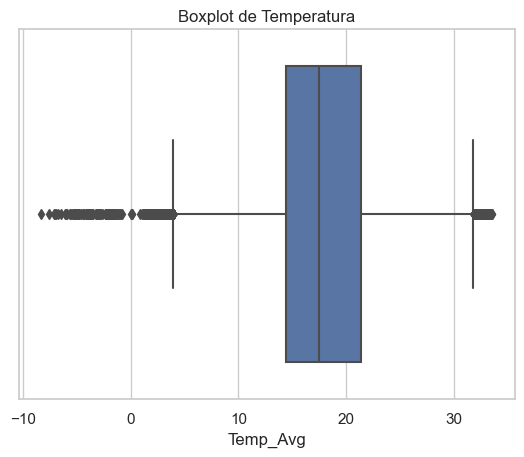

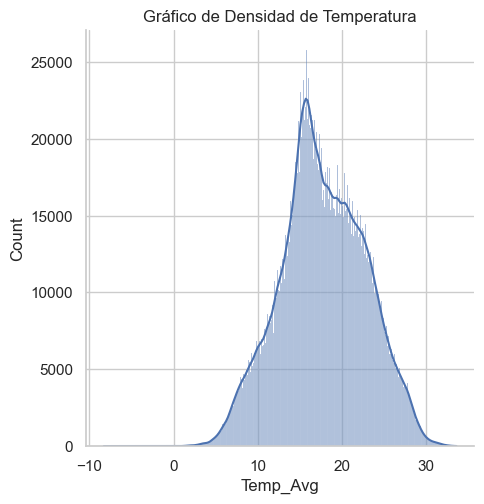

In [151]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=temp['Temp_Avg'])
plt.title('Boxplot de Temperatura')
plt.show()

sns.displot(temp['Temp_Avg'], kde=True)
plt.title('Gráfico de Densidad de Temperatura')
plt.show()

Se puede observar que hay una pequeña cantidad de datos atipicos. Sin embargo, estos no afectan demasiado los datos por lo cual pueden dejar por el momento.

###### Agrupación y medidas de variables

Después de verificar los datos atipicos que podemos tener, comenzamos con la agrupación de datos por Mes y Año para poder sacar el promedio y poder graficarlo a través de los 5 años el comportamiento que tiene la temperatura. Además de que reservamos unas variables también para la varianza, minimo y máximo.

In [118]:
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
temp['fecha'] = pd.to_datetime(temp['TIMESTAMP'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
temp_meses = temp.groupby(temp['fecha'].dt.to_period('M'))
temp_anos = temp.groupby(temp['fecha'].dt.to_period('Y'))

#VARIABLES PARA GRAFICAR
temp_avg_mes = temp_meses['Temp_Avg'].mean()
temp_avg_ano = temp_anos['Temp_Avg'].mean()
temp_varianza = temp['Temp_Avg'].var()
temp_minimo = temp['Temp_Avg'].min()
temp_maximo = temp['Temp_Avg'].max()

print("Temperaturas por mes:\n", temp_avg_mes)
print("Temperaturas por año:\n", temp_avg_ano)
print("Varianza de la temperatura", temp_varianza)
print("Minimo de la temperatura", temp_minimo)
print("Maximo de la temperatura", temp_maximo)

Temperaturas por mes:
 fecha
2018-10    17.202208
2018-11    14.593299
2018-12    13.237861
2019-01    13.900623
2019-02    16.602688
2019-03    18.678400
2019-04    19.552986
2019-05    21.498740
2019-06    19.789921
2019-07    17.817261
2019-08    18.467365
2019-09    18.093138
2019-10    17.566677
2019-11    16.588491
2019-12    14.226908
2020-01    14.070379
2020-02    16.557577
2020-03    19.108544
2020-04    21.090759
2020-05    20.441756
2020-06    20.358054
2020-07    18.797850
2020-08    17.972164
2020-09    17.906203
2020-10    16.978798
2020-11    15.300144
2020-12    14.570990
2021-01    14.694176
2021-02    15.886687
2021-03    19.120795
2021-04    20.239995
2021-05    20.229938
2021-06    18.084884
2021-07    17.805281
2021-08    17.749806
2021-09    17.502031
2021-10    17.549724
2021-11    14.552547
2021-12    14.309999
2022-01    14.587452
2022-02    15.566845
2022-03    17.986703
2022-04    19.962379
2022-05    21.839247
2022-06    18.810725
2022-07    18.215015
2022-

###### Gráficación de promedio de temperatura

Graficamos el promedio histórico de la temperatura en los últimos 5 años por mes y año

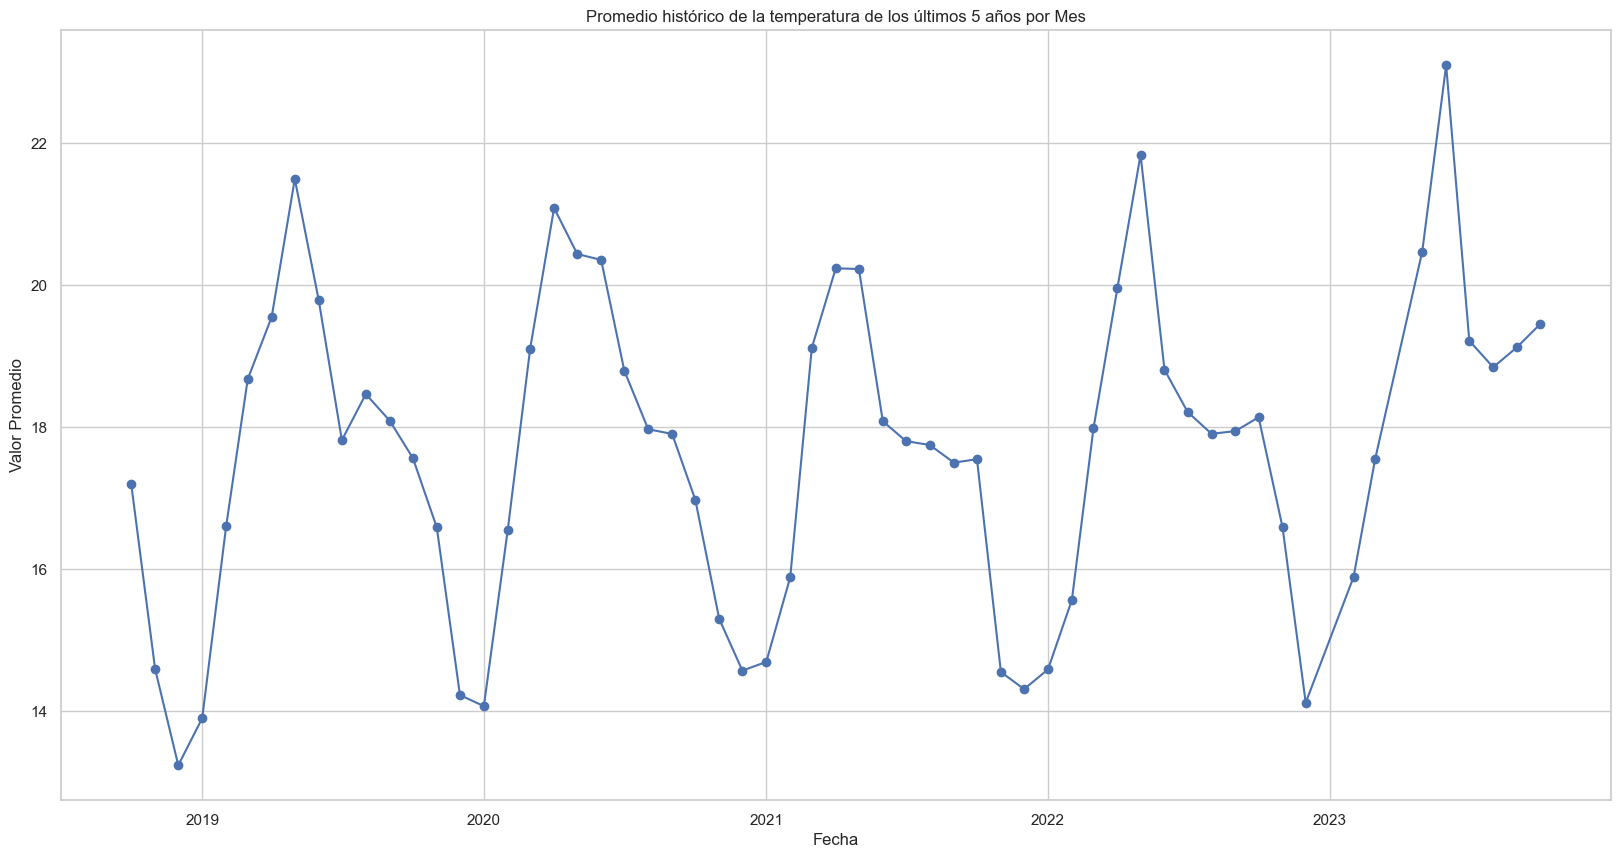

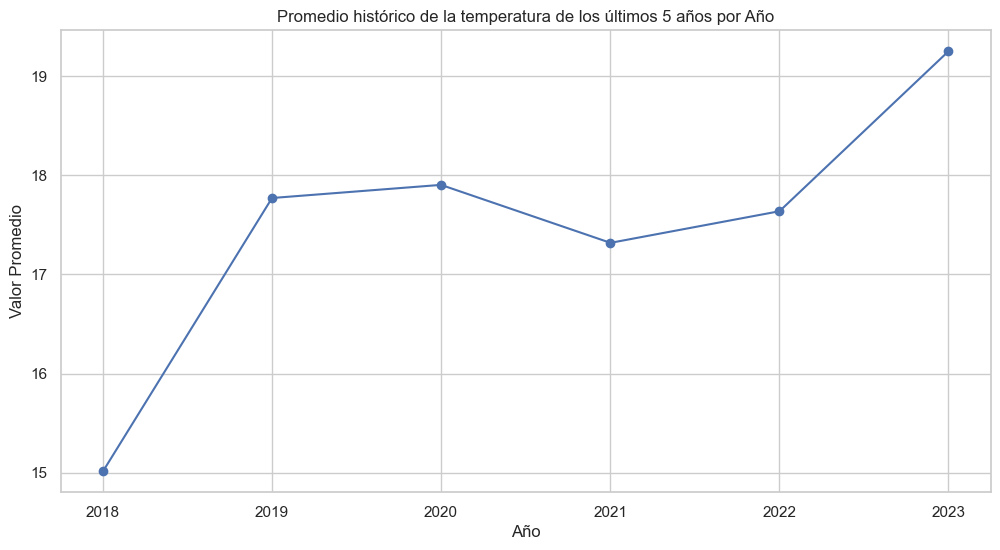

In [131]:
#GRAFICACIÓN DE 
meses = temp_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses, temp_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la temperatura de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Crear un gráfico de líneas
ano = temp_avg_ano.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(ano, temp_avg_ano.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la temperatura de los últimos 5 años por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


###### Varianza, Minimo y Máximo de la temperatura

También graficamos la varianza, el máximo y el mínimo de esta variable

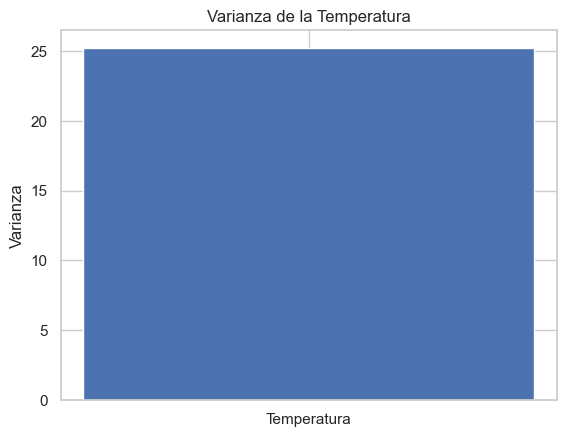

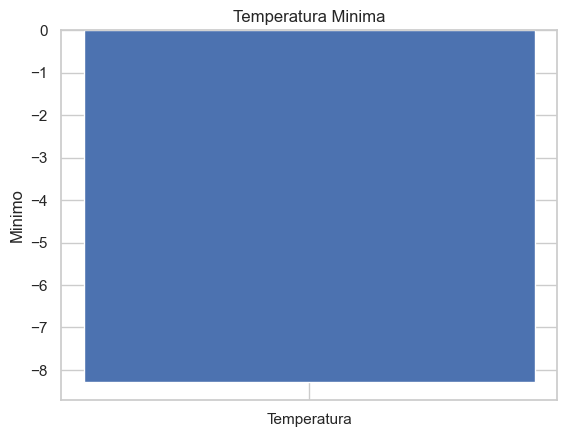

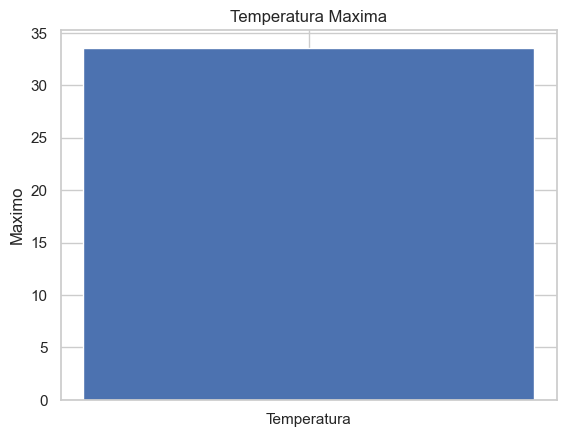

In [134]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Temperatura'], [temp_varianza])
plt.title('Varianza de la Temperatura')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Temperatura'], [temp_minimo])
plt.title('Temperatura Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Temperatura'], [temp_maximo])
plt.title('Temperatura Maxima')
plt.ylabel('Maximo')
plt.show()

##### Humedad

###### Detección de valores atipicos

Para detectar y graficar valores atípicos en tus datos, se puede utilizar diferentes técnicas y herramientas, pero una de las más comunes es el uso de gráficos de caja (boxplots) y cálculo de los valores atípicos utilizando umbrales basados en el rango intercuartílico (IQR). Aquí se muestra cómo se hizo con la biblioteca matplotlib y seaborn:

In [149]:
Q1 = rh['RH_Avg'].quantile(0.25)
Q3 = rh['RH_Avg'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = rh[(rh['RH_Avg'] < limite_inferior) | (rh['RH_Avg'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
Empty DataFrame
Columns: [TIMESTAMP, RH_Avg, fecha]
Index: []


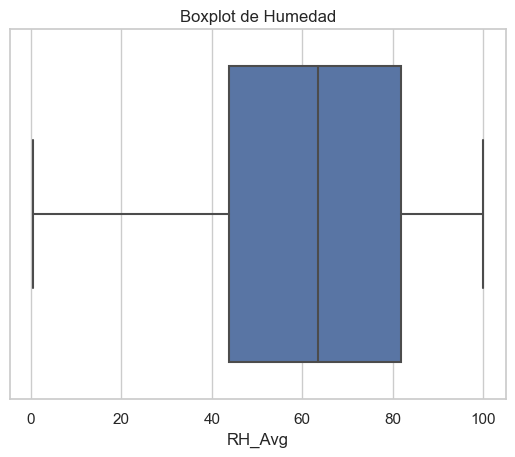

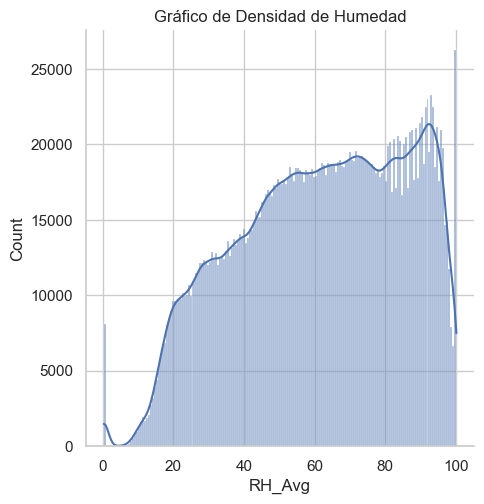

In [143]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=rh['RH_Avg'])
plt.title('Boxplot de Humedad')
plt.show()

sns.displot(rh['RH_Avg'], kde=True)
plt.title('Gráfico de Densidad de Humedad')
plt.show()


En este caso, no hay ningún dato atipico en todo el dataset por lo cual estos datos serán lo más acertados posible.

###### Agrupación y medidas de variables

Después de verificar los datos atipicos que podemos tener, comenzamos con la agrupación de datos por Mes y Año para poder sacar el promedio y poder graficarlo a través de los 5 años el comportamiento que tiene la humedad. Además de que reservamos unas variables también para la varianza, minimo y máximo.

In [128]:
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
rh['fecha'] = pd.to_datetime(rh['TIMESTAMP'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
rh_meses = rh.groupby(rh['fecha'].dt.to_period('M'))
rh_anos = rh.groupby(rh['fecha'].dt.to_period('Y'))

#VARIABLES PARA GRAFICAR
rh_avg_mes = rh_meses['RH_Avg'].mean()
rh_avg_ano = rh_anos['RH_Avg'].mean()
rh_varianza = rh['RH_Avg'].var()
rh_minimo = rh['RH_Avg'].min()
rh_maximo = rh['RH_Avg'].max()

print("Humedad por mes:\n", rh_avg_mes)
print("Humedad por año:\n", rh_avg_ano)
print("Varianza de la Humedad", rh_varianza)
print("Minimo de la Humedad", rh_minimo)
print("Maximo de la Humedad", rh_maximo)

Humedad por mes:
 fecha
2018-10    78.804879
2018-11    74.242277
2018-12    69.113041
2019-01    59.711486
2019-02    51.383192
2019-03    44.083051
2019-04    33.444258
2019-05    40.871102
2019-06    68.659178
2019-07    74.591092
2019-08    72.979779
2019-09    75.213867
2019-10    76.197204
2019-11    74.037325
2019-12    66.845303
2020-01    55.020578
2020-02    55.407009
2020-03    52.632958
2020-04    38.866071
2020-05    41.501894
2020-06    60.521018
2020-07    72.081825
2020-08    78.895252
2020-09    77.531686
2020-10    64.756220
2020-11    62.316583
2020-12    64.079724
2021-01    56.770135
2021-02    43.897322
2021-03    40.913374
2021-04    33.245981
2021-05    48.975762
2021-06    73.118945
2021-07    75.974175
2021-08    79.597830
2021-09    79.537240
2021-10    75.862570
2021-11    66.526003
2021-12    62.114791
2022-01    60.930225
2022-02    54.637708
2022-03    38.297698
2022-04    42.625965
2022-05    41.853539
2022-06    71.269566
2022-07    77.209326
2022-08   

###### Gráficación de promedio de humedad

Graficamos el promedio histórico de la humedad en los últimos 5 años por mes y año

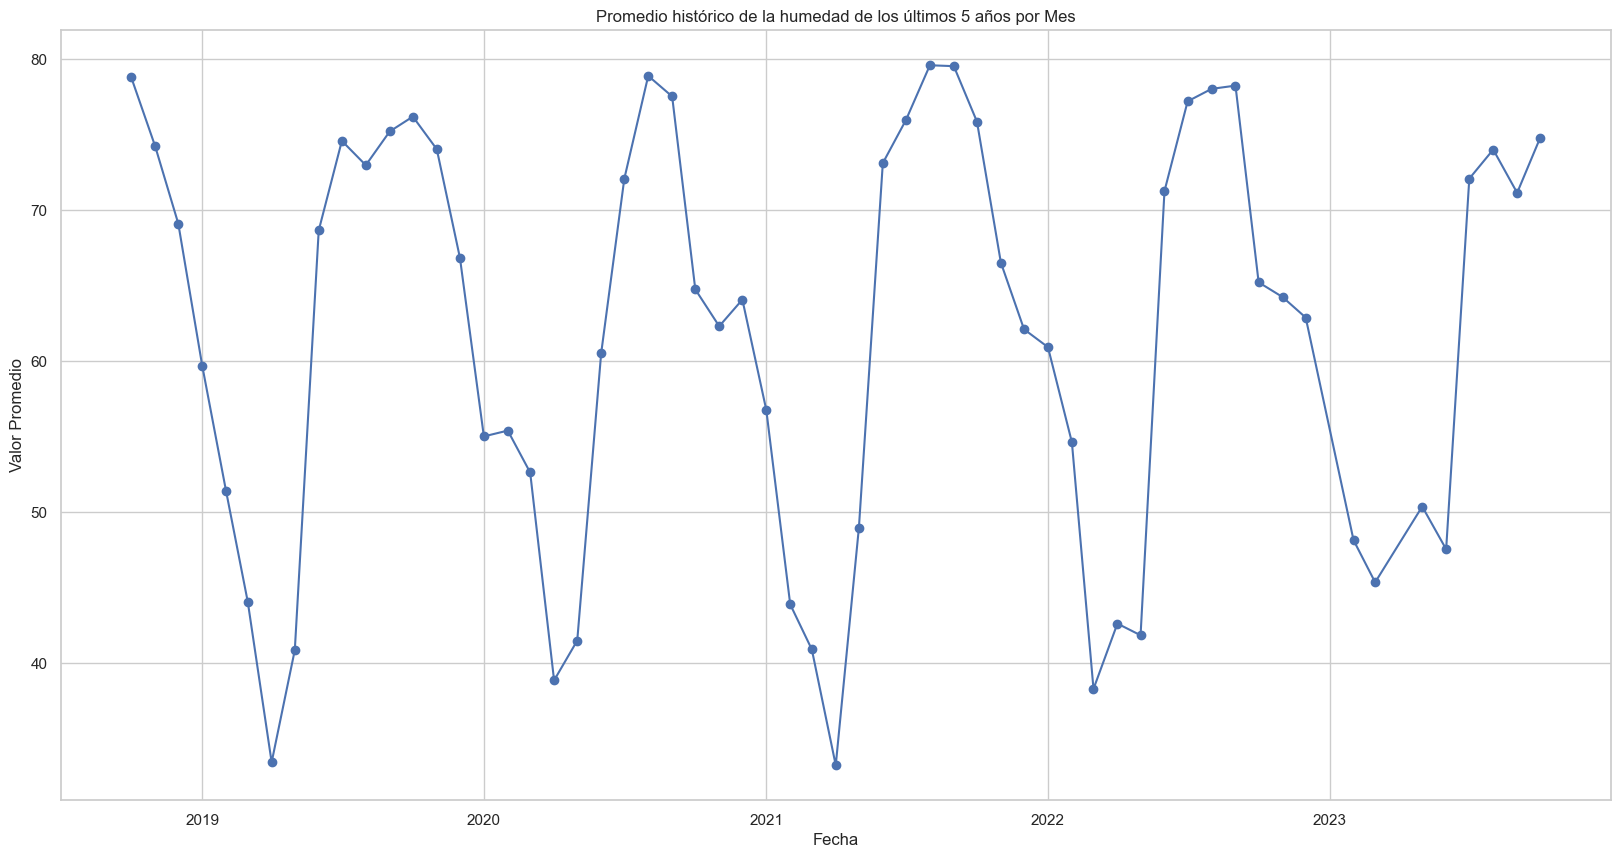

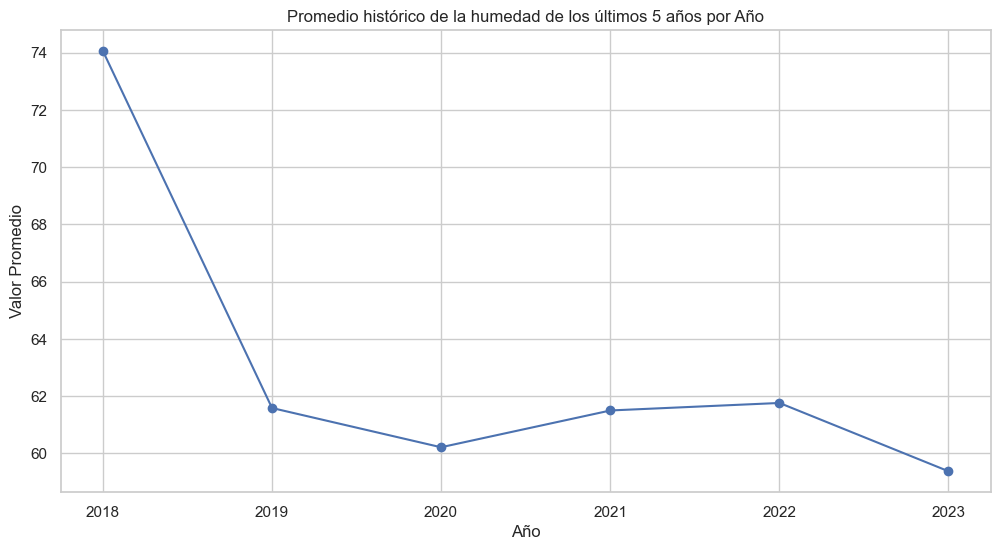

In [130]:
#GRAFICACIÓN DE 
meses = rh_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses, rh_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la humedad de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Crear un gráfico de líneas
ano = rh_avg_ano.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(ano, rh_avg_ano.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la humedad de los últimos 5 años por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


###### Varianza, Minimo y Máximo de la humedad

También graficamos la varianza, el máximo y el mínimo de esta variable

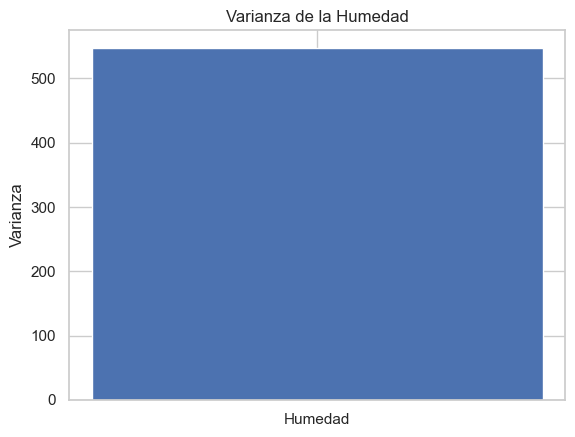

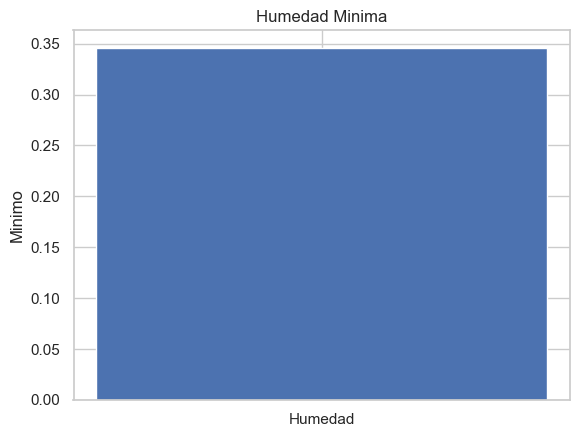

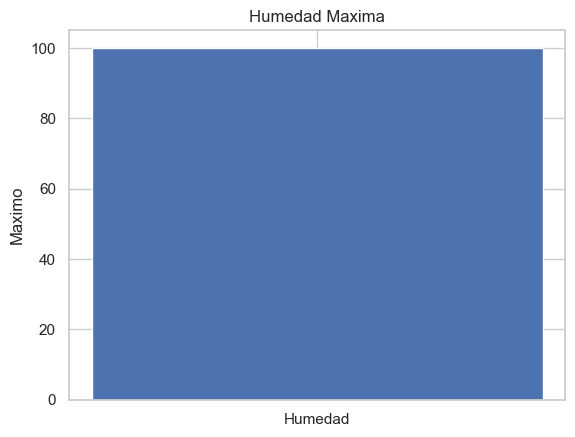

In [172]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Humedad'], [rh_varianza])
plt.title('Varianza de la Humedad')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Humedad'], [rh_minimo])
plt.title('Humedad Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Humedad'], [rh_maximo])
plt.title('Humedad Maxima')
plt.ylabel('Maximo')
plt.show()

##### Viento (Velocidad y Dirección)

###### Detección de valores atipicos

Para detectar y graficar valores atípicos en tus datos, se puede utilizar diferentes técnicas y herramientas, pero una de las más comunes es el uso de gráficos de caja (boxplots) y cálculo de los valores atípicos utilizando umbrales basados en el rango intercuartílico (IQR). Aquí se muestra cómo se hizo con la biblioteca matplotlib y seaborn:

**VELOCIDAD DEL VIENTO**

In [167]:
Q1 = wind['WSpeed_Avg'].quantile(0.25)
Q3 = wind['WSpeed_Avg'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = wind[(wind['WSpeed_Avg'] < limite_inferior) | (wind['WSpeed_Avg'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                TIMESTAMP  WSpeed_Avg  WDir_Avg               fecha
819      01/10/2018 13:39       6.306     8.510 2018-10-01 13:39:00
917      01/10/2018 15:17       6.323   355.000 2018-10-01 15:17:00
920      01/10/2018 15:20       7.050     0.000 2018-10-01 15:20:00
921      01/10/2018 15:21       6.477     2.961 2018-10-01 15:21:00
922      01/10/2018 15:22       8.470    10.840 2018-10-01 15:22:00
...                   ...         ...       ...                 ...
2521955  07/10/2023 19:28       6.509    66.130 2023-10-07 19:28:00
2521960  07/10/2023 19:33       5.663    62.270 2023-10-07 19:33:00
2521968  07/10/2023 19:41       6.004    72.010 2023-10-07 19:41:00
2521969  07/10/2023 19:42       5.951    61.510 2023-10-07 19:42:00
2522008  07/10/2023 20:21       5.745    32.780 2023-10-07 20:21:00

[40400 rows x 4 columns]


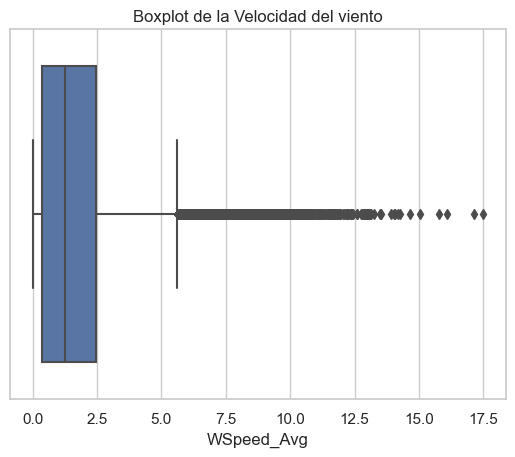

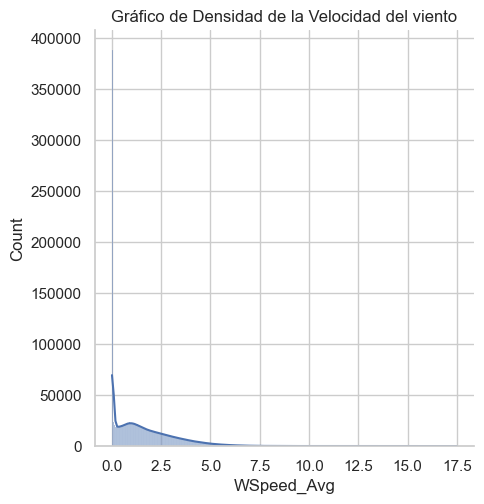

In [169]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=wind['WSpeed_Avg'])
plt.title('Boxplot de la Velocidad del viento')
plt.show()

sns.displot(wind['WSpeed_Avg'], kde=True)
plt.title('Gráfico de Densidad de la Velocidad del viento')
plt.show()


En cuanto a la velocidad del viento, se puede ver que hay una gran cantidad de datos atipicos. Ya que la distribución en la ultima grafica se ve algo poco uniforme.

**DIRECCIÓN DEL VIENTO**

In [170]:
Q1 = wind['WDir_Avg'].quantile(0.25)
Q3 = wind['WDir_Avg'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = wind[(wind['WDir_Avg'] < limite_inferior) | (wind['WDir_Avg'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
Empty DataFrame
Columns: [TIMESTAMP, WSpeed_Avg, WDir_Avg, fecha]
Index: []


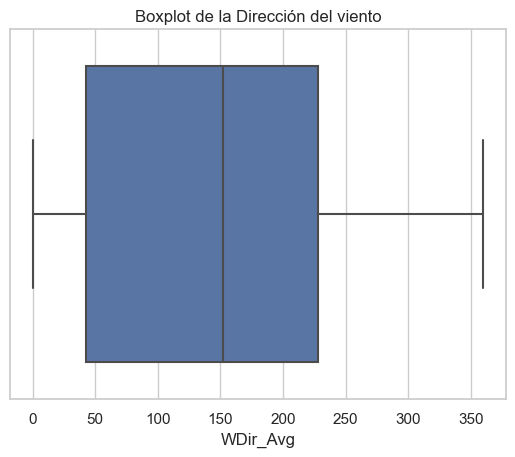

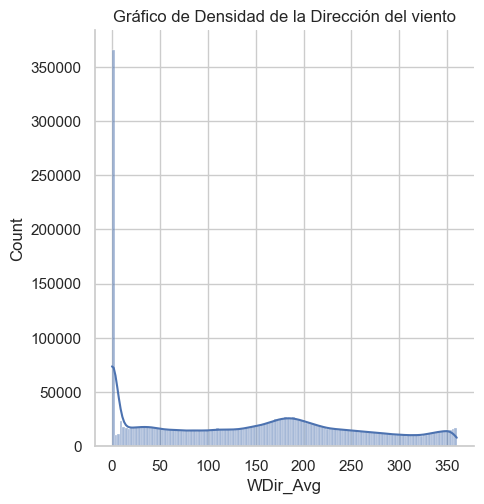

In [171]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=wind['WDir_Avg'])
plt.title('Boxplot de la Dirección del viento')
plt.show()

sns.displot(wind['WDir_Avg'], kde=True)
plt.title('Gráfico de Densidad de la Dirección del viento')
plt.show()


En cuanto a la dirección del viente, se puede ver que los datos están bien ya que no se encuentra ningun dato atipico.

###### Agrupación y medidas de variables

Después de verificar los datos atipicos que podemos tener, comenzamos con la agrupación de datos por Mes y Año para poder sacar el promedio y poder graficarlo a través de los 5 años el comportamiento que tiene la velocidad del viento y su dirección. Además de que reservamos unas variables también para la varianza, minimo y máximo.

**VELOCIDAD DEL VIENTO**

In [155]:
#VELOCIDAD DEL VIENTO
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
wind['fecha'] = pd.to_datetime(wind['TIMESTAMP'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
wind_meses = wind.groupby(wind['fecha'].dt.to_period('M'))
wind_anos = wind.groupby(wind['fecha'].dt.to_period('Y'))

#VARIABLES PARA GRAFICAR
winds_avg_mes = wind_meses['WSpeed_Avg'].mean()
winds_avg_ano = wind_anos['WSpeed_Avg'].mean()
winds_varianza = wind['WSpeed_Avg'].var()
winds_minimo = wind['WSpeed_Avg'].min()
winds_maximo = wind['WSpeed_Avg'].max()

print("Velocidad del viento por mes:\n", winds_avg_mes)
print("Velocidad del viento por año:\n", winds_avg_ano)
print("Varianza de la Velocidad del viento", winds_varianza)
print("Minimo de la Velocidad del viento", winds_minimo)
print("Maximo de la Velocidad del viento", winds_maximo)

Velocidad del viento por mes:
 fecha
2018-10    1.343237
2018-11    1.231254
2018-12    1.285418
2019-01    1.470585
2019-02    1.765450
2019-03    1.974770
2019-04    2.162139
2019-05    2.195172
2019-06    1.757905
2019-07    1.487037
2019-08    1.498793
2019-09    1.473293
2019-10    1.355685
2019-11    1.205983
2019-12    1.307764
2020-01    1.725483
2020-02    1.791000
2020-03    1.838374
2020-04    2.109846
2020-05    2.033318
2020-06    2.155743
2020-07    1.634345
2020-08    1.444022
2020-09    1.463591
2020-10    1.415229
2020-11    1.833849
2020-12    1.627241
2021-01    1.535150
2021-02    2.019921
2021-03    1.848982
2021-04    2.118573
2021-05    2.058920
2021-06    1.672704
2021-07    1.368969
2021-08    1.408854
2021-09    1.397137
2021-10    1.379999
2021-11    1.176699
2021-12    1.185244
2022-01    1.517660
2022-02    1.700041
2022-03    2.160967
2022-04    1.899466
2022-05    2.014881
2022-06    1.671404
2022-07    1.381688
2022-08    1.335411
2022-09    1.545638
202

**DIRECCIÓN DEL VIENTO**

In [157]:
#DIRECCIÓN DEL VIENTO
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
wind['fecha'] = pd.to_datetime(wind['TIMESTAMP'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
wind_meses = wind.groupby(wind['fecha'].dt.to_period('M'))
wind_anos = wind.groupby(wind['fecha'].dt.to_period('Y'))

#VARIABLES PARA GRAFICAR
windd_avg_mes = wind_meses['WDir_Avg'].mean()
windd_avg_ano = wind_anos['WDir_Avg'].mean()
windd_varianza = wind['WDir_Avg'].var()
windd_minimo = wind['WDir_Avg'].min()
windd_maximo = wind['WDir_Avg'].max()

print("Dirección del viento por mes:\n", windd_avg_mes)
print("Dirección del viento por año:\n", windd_avg_ano)
print("Varianza de la Dirección del viento", windd_varianza)
print("Minimo de la Dirección del viento", windd_minimo)
print("Maximo de la Dirección del viento", windd_maximo)

Dirección del viento por mes:
 fecha
2018-10    131.177310
2018-11    115.144137
2018-12    128.133191
2019-01    128.279495
2019-02    141.683998
2019-03    162.004144
2019-04    141.676186
2019-05    169.455004
2019-06    154.850818
2019-07    148.518828
2019-08    142.391662
2019-09    150.481158
2019-10    146.941515
2019-11    141.525326
2019-12    131.978298
2020-01    138.546800
2020-02    138.474245
2020-03    151.824408
2020-04    143.027825
2020-05    160.765366
2020-06    167.411453
2020-07    159.242566
2020-08    160.271616
2020-09    155.256855
2020-10    141.401332
2020-11    138.569822
2020-12    130.953981
2021-01    130.927531
2021-02    137.964067
2021-03    134.145814
2021-04    163.514027
2021-05    159.461113
2021-06    139.834631
2021-07    131.207131
2021-08    132.612330
2021-09    132.100276
2021-10    145.339298
2021-11    153.235118
2021-12    154.584131
2022-01    165.940091
2022-02    172.112113
2022-03    173.962028
2022-04    166.703407
2022-05    165.04

###### Gráficación de promedio del viento

Graficamos el promedio histórico de la velocidad del viento y su dirección en los últimos 5 años por mes y año

**VELOCIDAD DEL VIENTO**

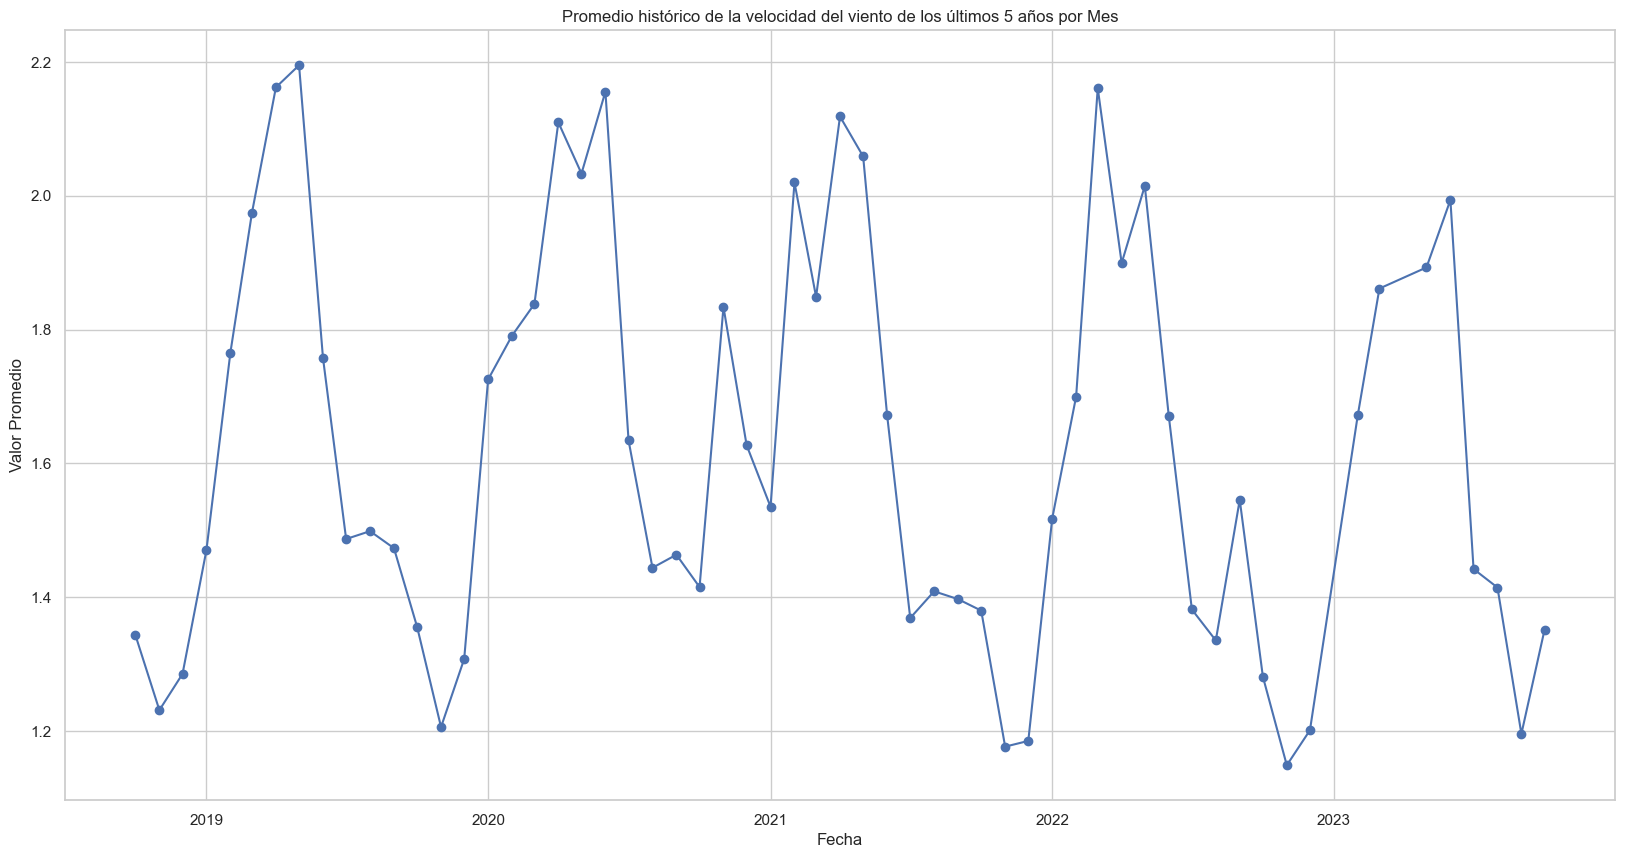

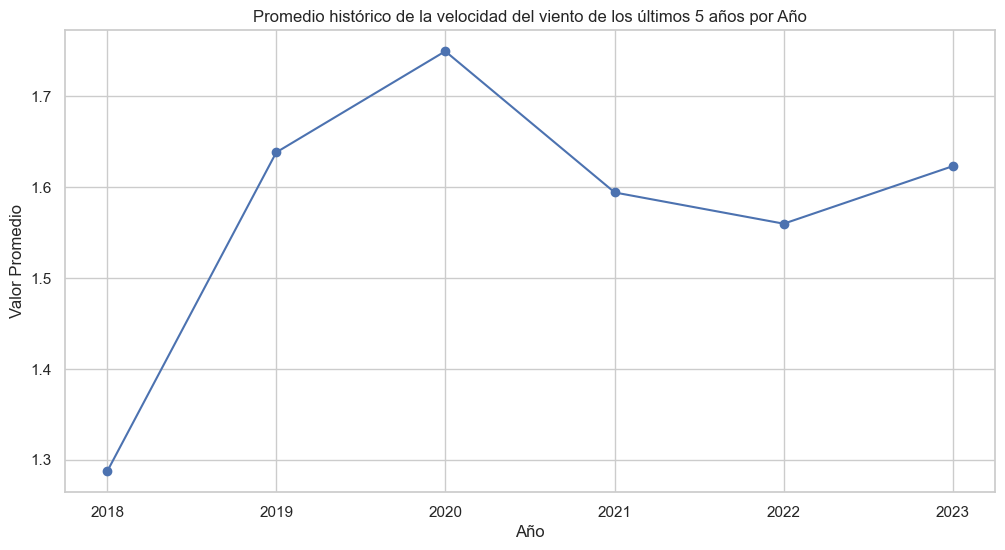

In [165]:
#GRAFICACIÓN DE 
meses_s = winds_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses_s, winds_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la velocidad del viento de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Crear un gráfico de líneas
ano_s = winds_avg_ano.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(ano_s, winds_avg_ano.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la velocidad del viento de los últimos 5 años por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


**DIRECCIÓN DEL VIENTO**

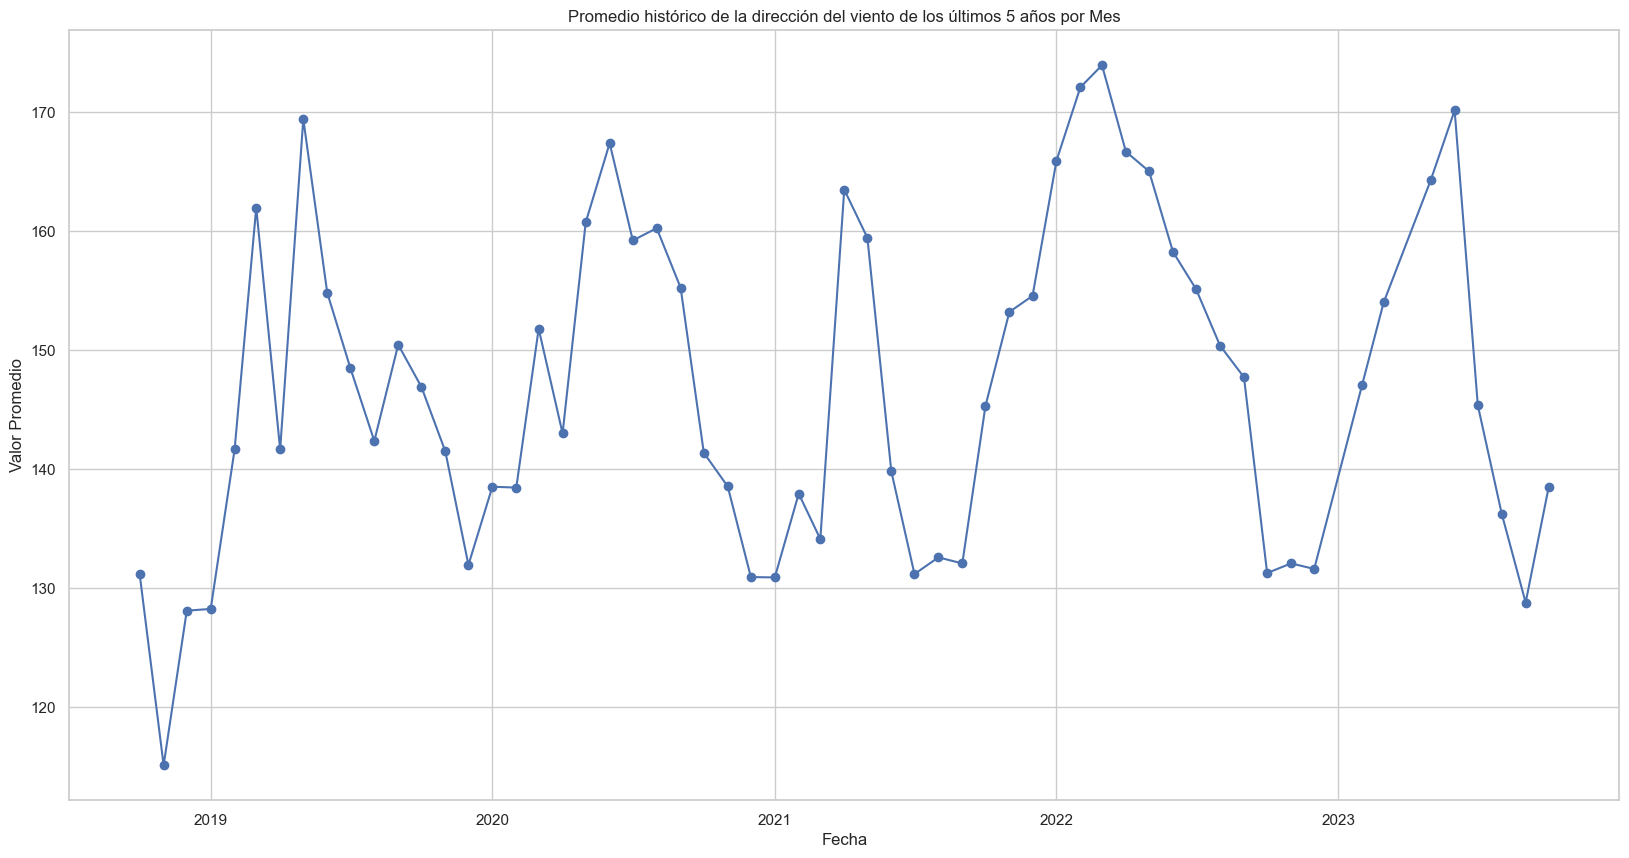

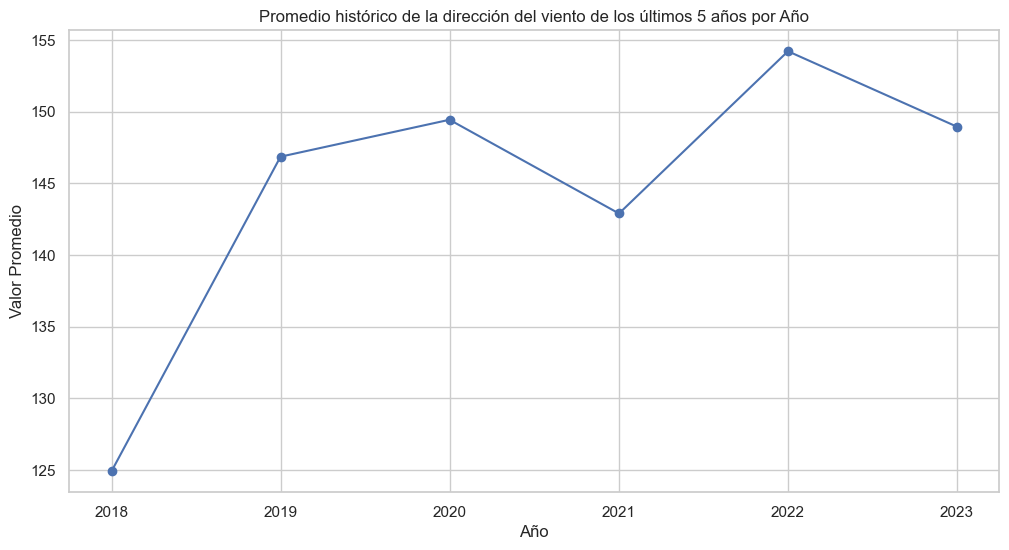

In [166]:
#GRAFICACIÓN DE 
meses_d = windd_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses_d, windd_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la dirección del viento de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Crear un gráfico de líneas
ano_d = winds_avg_ano.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(ano_d, windd_avg_ano.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la dirección del viento de los últimos 5 años por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


###### Varianza, Minimo y Máximo del viento

También graficamos la varianza, el máximo y el mínimo de esta variable

**VELOCIDAD DEL VIENTO**

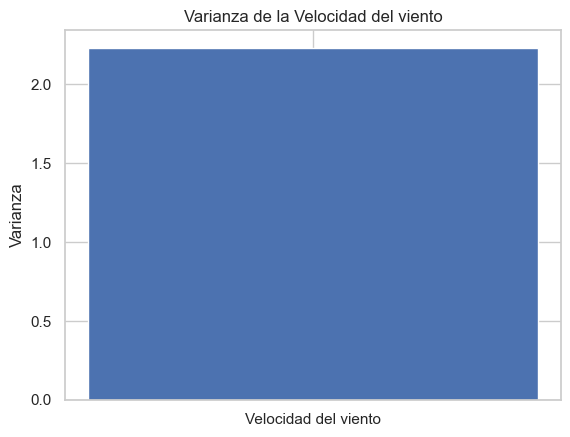

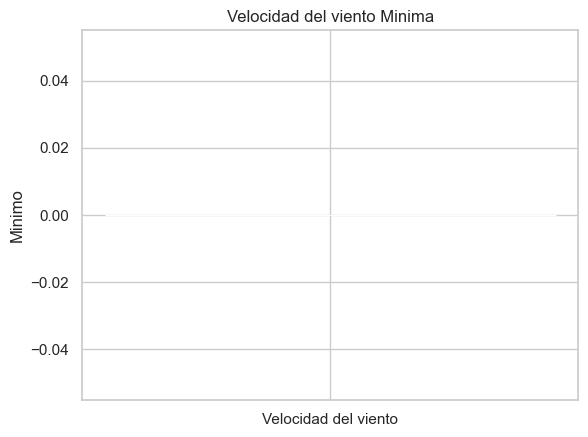

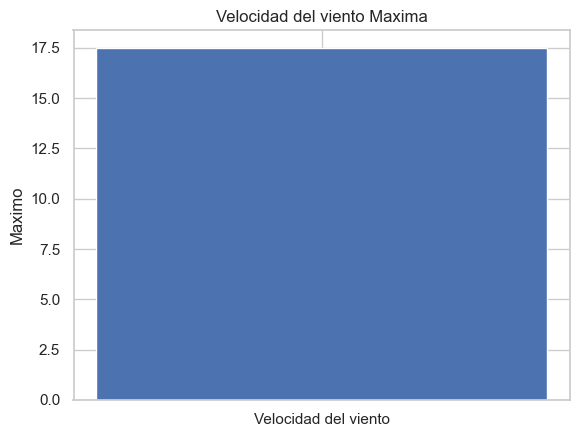

In [173]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Velocidad del viento'], [winds_varianza])
plt.title('Varianza de la Velocidad del viento')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Velocidad del viento'], [winds_minimo])
plt.title('Velocidad del viento Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Velocidad del viento'], [winds_maximo])
plt.title('Velocidad del viento Maxima')
plt.ylabel('Maximo')
plt.show()

**DIRECCIÓN DEL VIENTO**

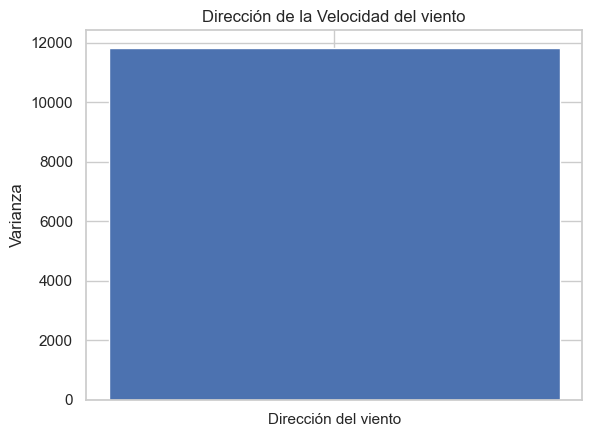

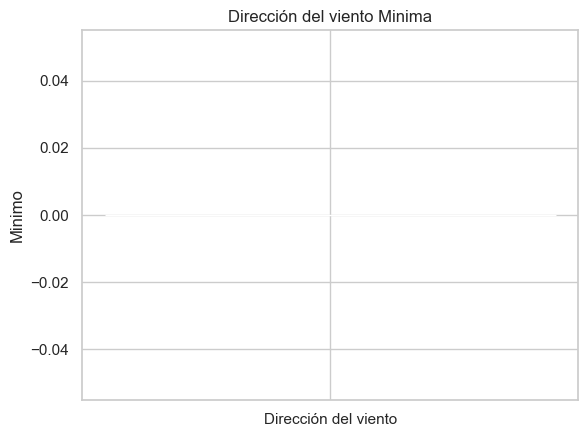

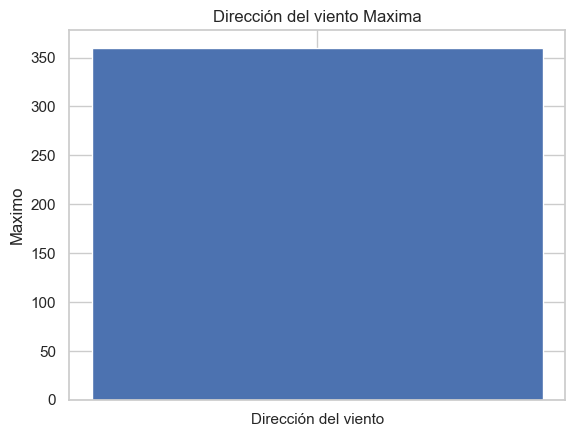

In [174]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Dirección del viento'], [windd_varianza])
plt.title('Dirección de la Velocidad del viento')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Dirección del viento'], [windd_minimo])
plt.title('Dirección del viento Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Dirección del viento'], [windd_maximo])
plt.title('Dirección del viento Maxima')
plt.ylabel('Maximo')
plt.show()

En cuanto al minimo de las dos graficas, se puede explicar de que debido a que lo más bajo que estuvo el viento en dirección y velocidad fue 0, por lo cual no se puede graficar en absoluto ya que es 0.

##### Ozono

###### Detección de valores atipicos

Para detectar y graficar valores atípicos en tus datos, se puede utilizar diferentes técnicas y herramientas, pero una de las más comunes es el uso de gráficos de caja (boxplots) y cálculo de los valores atípicos utilizando umbrales basados en el rango intercuartílico (IQR). Aquí se muestra cómo se hizo con la biblioteca matplotlib y seaborn:

In [13]:
Q1 = caire_o3['O3'].quantile(0.25)
Q3 = caire_o3['O3'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = caire_o3[(caire_o3['O3'] < limite_inferior) | (caire_o3['O3'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                     Time      O3 O3_flag
1114306  12/11/2020 19:46  174.36      OK
1114307  12/11/2020 19:47  301.30      OK
1114308  12/11/2020 19:48  333.63      OK
1114309  12/11/2020 19:49  349.00      OK
1114310  12/11/2020 19:50  355.70      OK
...                   ...     ...     ...
2596814  22/09/2023 16:07   81.51      OK
2596815  22/09/2023 16:08   81.15      OK
2596817  22/09/2023 16:10   80.66      OK
2596818  22/09/2023 16:11   81.73      OK
2596819  22/09/2023 16:12   82.62      OK

[3842 rows x 3 columns]


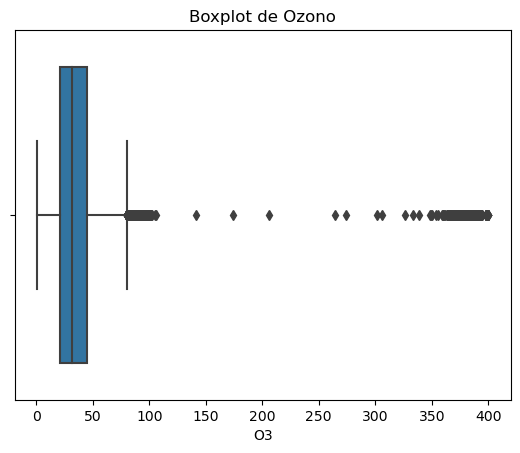

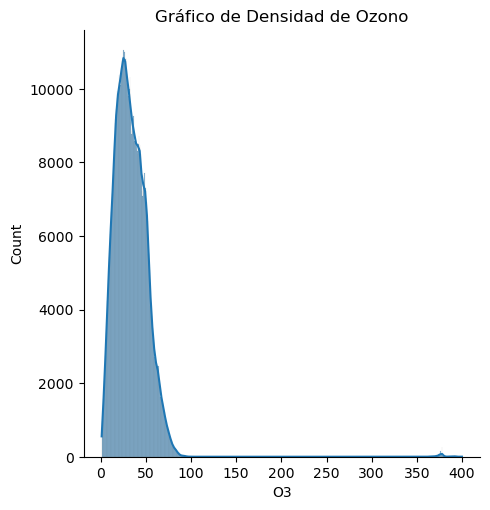

In [14]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=caire_o3['O3'])
plt.title('Boxplot de Ozono')
plt.show()

sns.displot(caire_o3['O3'], kde=True)
plt.title('Gráfico de Densidad de Ozono')
plt.show()

Hay varios datos atipicos en este dataset, sin embargo, debido a que al no ser demasiados no afecta los resultados radicalmente.

###### Agrupación y medidas de variables

Después de verificar los datos atipicos que podemos tener, comenzamos con la agrupación de datos por Mes y Año para poder sacar el promedio y poder graficarlo a través de los 5 años el comportamiento que tiene el Ozono. Además de que reservamos unas variables también para la varianza, minimo y máximo.

In [193]:
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
caire_o3['fecha'] = pd.to_datetime(caire_o3['Time'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
o3_meses = caire_o3.groupby(caire_o3['fecha'].dt.to_period('M'))
o3_anos = caire_o3.groupby(caire_o3['fecha'].dt.to_period('Y'))

#VARIABLES PARA GRAFICAR
o3_avg_mes = o3_meses['O3'].mean()
o3_avg_ano = o3_anos['O3'].mean()
o3_varianza = caire_o3['O3'].var()
o3_minimo = caire_o3['O3'].min()
o3_maximo = caire_o3['O3'].max()

print("Cantidad de Ozono (O3) por mes:\n", o3_avg_mes)
print("Cantidad de Ozono (O3) por año:\n", o3_avg_ano)
print("Varianza de la Cantidad de Ozono (O3)", o3_varianza)
print("Minimo de la Cantidad de Ozono (O3)", o3_minimo)
print("Maximo de la Cantidad de Ozono (O3)", o3_maximo)

Cantidad de Ozono (O3) por mes:
 fecha
2020-11    43.212613
2020-12    26.539330
2021-01    29.233944
2021-02    36.396473
2021-03    37.937944
2021-04    41.508099
2021-05    41.500178
2021-06    27.585544
2021-07    27.922796
2021-08    25.104144
2021-09    15.248612
2022-09    50.560927
2022-10    25.056177
2022-11    27.755738
2022-12    29.581551
2023-01    32.867217
2023-02    33.145313
2023-03    35.458834
2023-04    42.558846
2023-05    45.837820
2023-06    42.932510
2023-07    36.703889
2023-08    30.849597
2023-09    32.855033
2023-10    26.819876
Freq: M, Name: O3, dtype: float64
Cantidad de Ozono (O3) por año:
 fecha
2020    32.718409
2021    32.939358
2022    28.332106
2023    36.335321
Freq: A-DEC, Name: O3, dtype: float64
Varianza de la Cantidad de Ozono (O3) 419.61012689464
Minimo de la Cantidad de Ozono (O3) 1.0
Maximo de la Cantidad de Ozono (O3) 400.0


###### Gráficación de promedio del Ozono

Graficamos el promedio histórico del Ozono en los últimos 5 años por mes y año

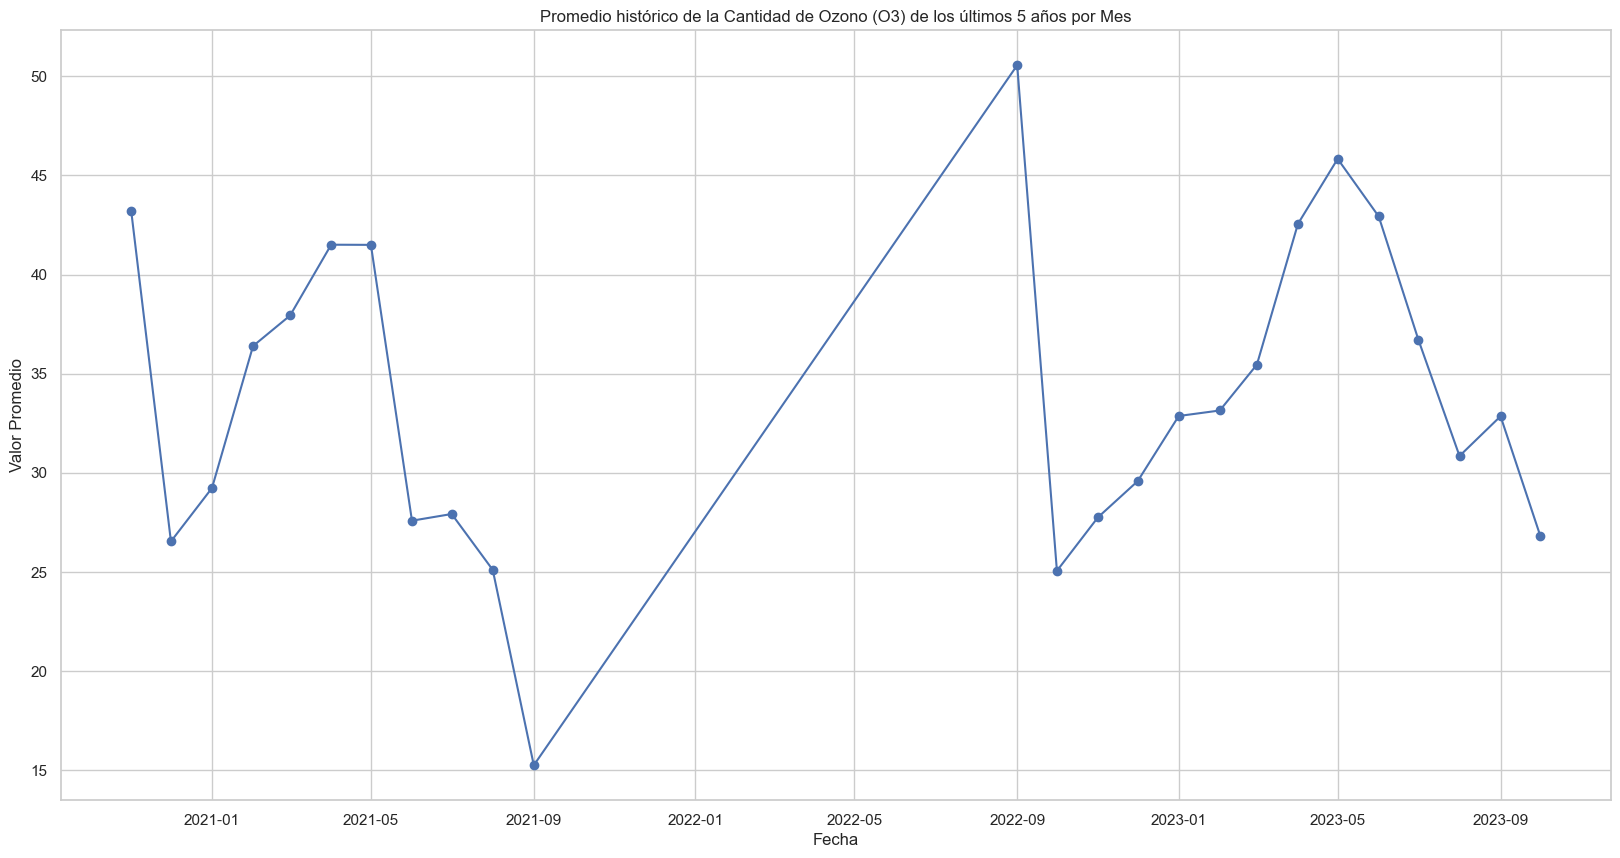

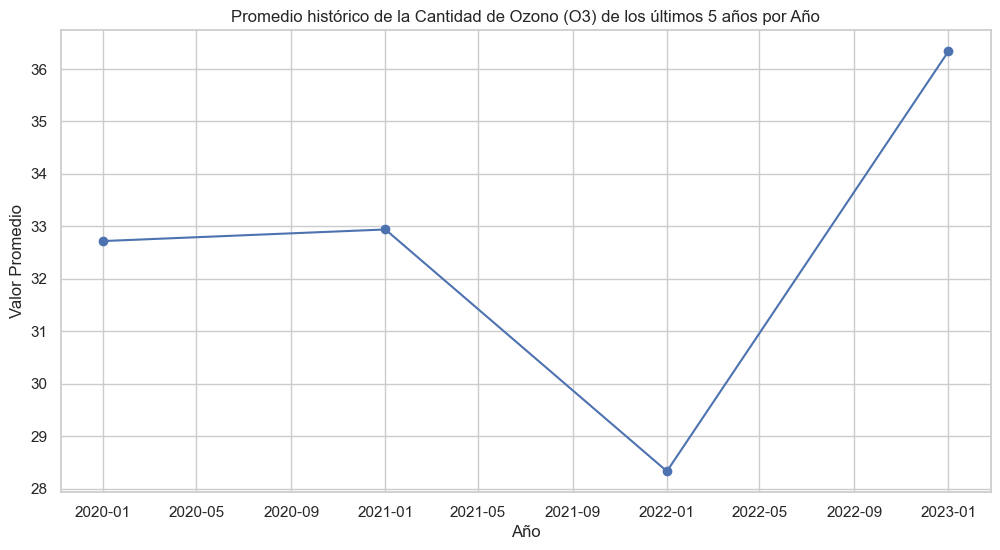

In [195]:
#GRAFICACIÓN DE 
meses = o3_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses, o3_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la Cantidad de Ozono (O3) de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Crear un gráfico de líneas
ano = o3_avg_ano.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(ano, o3_avg_ano.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la Cantidad de Ozono (O3) de los últimos 5 años por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Hay un comportamiento bastante raro entre el septiembre del 2021 y septiembre de 2022 ya que en ese periodo de tiempo el dataset antes de limpiarse eran nulos ya que estaba fuera de servicio por alguna razón lo cual causo una perdida de datos significativa por un año entero en el registro del Ozono.

###### Varianza, Minimo y Máximo del Ozono

También graficamos la varianza, el máximo y el mínimo de esta variable

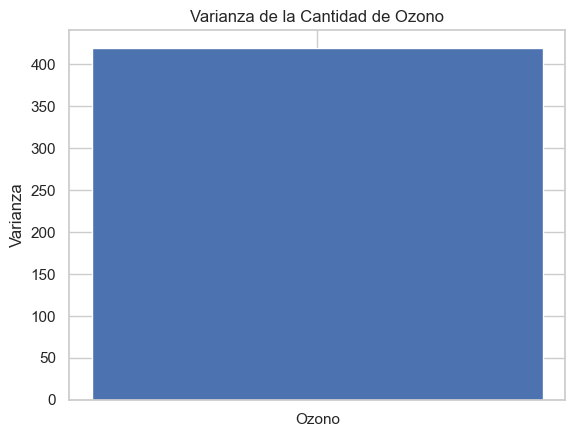

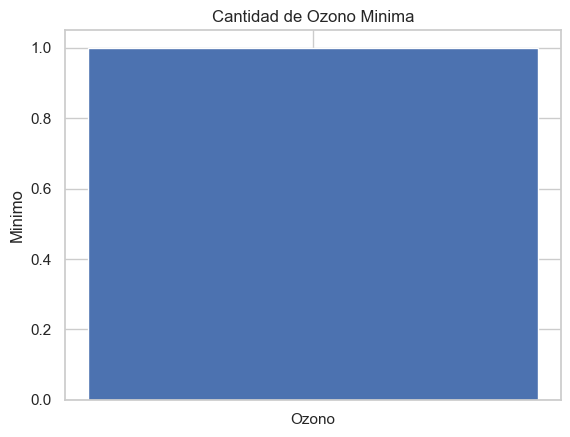

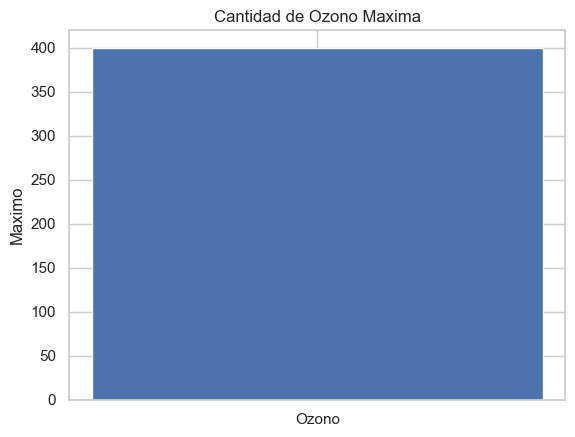

In [196]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Ozono'], [o3_varianza])
plt.title('Varianza de la Cantidad de Ozono')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Ozono'], [o3_minimo])
plt.title('Cantidad de Ozono Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Ozono'], [o3_maximo])
plt.title('Cantidad de Ozono Maxima')
plt.ylabel('Maximo')
plt.show()

##### Dioxido de Azufre

###### Detección de valores atipicos

Para detectar y graficar valores atípicos en tus datos, se puede utilizar diferentes técnicas y herramientas, pero una de las más comunes es el uso de gráficos de caja (boxplots) y cálculo de los valores atípicos utilizando umbrales basados en el rango intercuartílico (IQR). Aquí se muestra cómo se hizo con la biblioteca matplotlib y seaborn:

In [231]:
Q1 = caire_so2['SO2'].quantile(0.25)
Q3 = caire_so2['SO2'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = caire_so2[(caire_so2['SO2'] < limite_inferior) | (caire_so2['SO2'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                     Time   SO2 SO2_flag
3392     03/10/2018 08:32  3.47       OK
3393     03/10/2018 08:33  3.66       OK
3394     03/10/2018 08:34  3.42       OK
3400     03/10/2018 08:40  2.89       OK
4941     04/10/2018 10:21  2.88       OK
...                   ...   ...      ...
2352627  23/03/2023 16:26  4.13       OK
2352631  23/03/2023 16:30  3.20       OK
2352636  23/03/2023 16:35  3.42       OK
2352639  23/03/2023 16:38  4.45       OK
2352642  23/03/2023 16:41  2.91       OK

[36566 rows x 3 columns]


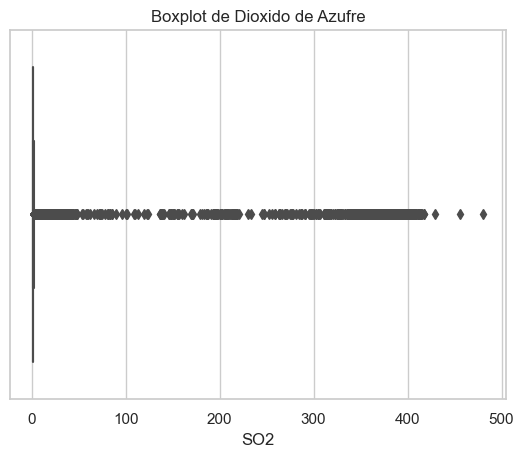

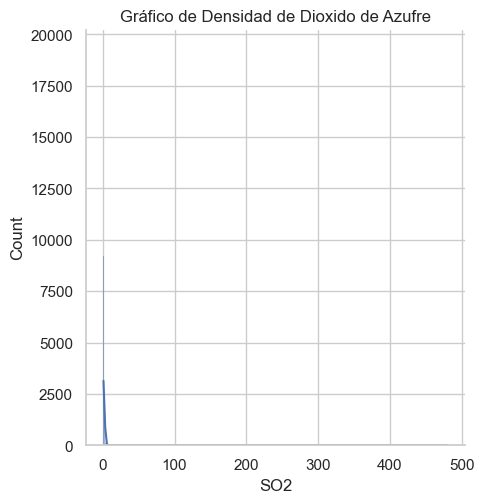

In [232]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=caire_so2['SO2'])
plt.title('Boxplot de Dioxido de Azufre')
plt.show()

sns.displot(caire_so2['SO2'], kde=True)
plt.title('Gráfico de Densidad de Dioxido de Azufre')
plt.show()

Podemos ver en las gráficas anteriores, una gran cantidad de datos atipicos en este dataset, lo cual comprometería la interpretación de su información y su manipulación.
Por lo que intentaremos sacar la mayor cantidad de estos datos para llegar a una versión más confiable.  
Primero se intenta crear una versión de este dataset y lo comparamos con el original y vemos la diferencia entre estos mediante sus maximos y minimos:

In [238]:
# Filtrar los valores no atípicos
caire_so2_copia = caire_so2[(caire_so2['SO2'] >= limite_inferior) & (caire_so2['SO2'] <= limite_superior)]

so2_minimo_original = caire_so2['SO2'].min()
so2_maximo_original = caire_so2['SO2'].max()
print("CON ATIPICOS\nMinimo de la Dioxido de Azufre (SO2) con atipicos", so2_minimo_original)
print("Maximo de la Dioxido de Azufre (SO2) con atipicos", so2_maximo_original,"\n\n")

so2_minimo = caire_so2_copia['SO2'].min()
so2_maximo = caire_so2_copia['SO2'].max()
print("SIN ATIPICOS\nMinimo de la Dioxido de Azufre (SO2) sin atipicos", so2_minimo)
print("Maximo de la Dioxido de Azufre (SO2) sin atipicos", so2_maximo)

CON ATIPICOS
Minimo de la Dioxido de Azufre (SO2) con atipicos 1.0
Maximo de la Dioxido de Azufre (SO2) con atipicos 480.73 


SIN ATIPICOS
Minimo de la Dioxido de Azufre (SO2) sin atipicos 1.0
Maximo de la Dioxido de Azufre (SO2) sin atipicos 2.87


Como se puede ver en la anterior comparación, hay una gran diferencia entre los dataset. Por lo que se optará por eliminar estos datos atipicos para mejorar el analisis de esta variable. Y para comprobar eso, se realizará otro analisis de datos atipicos para comprobar la reducción de los datos atipicos:

In [239]:
#SE ELIMINAN TODOS LOS DATOS ATIPICOS DEL DATASET
caire_so2 = caire_so2[(caire_so2['SO2'] >= limite_inferior) & (caire_so2['SO2'] <= limite_superior)]

Q1 = caire_so2['SO2'].quantile(0.25)
Q3 = caire_so2['SO2'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = caire_so2[(caire_so2['SO2'] < limite_inferior) | (caire_so2['SO2'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                     Time   SO2 SO2_flag
2054     02/10/2018 10:14  2.65       OK
3390     03/10/2018 08:30  2.69       OK
3395     03/10/2018 08:35  2.71       OK
3396     03/10/2018 08:36  2.84       OK
3401     03/10/2018 08:41  2.78       OK
...                   ...   ...      ...
2351118  22/03/2023 15:17  2.69       OK
2351173  22/03/2023 16:12  2.83       OK
2351185  22/03/2023 16:24  2.77       OK
2352604  23/03/2023 16:03  2.65       OK
2352633  23/03/2023 16:32  2.69       OK

[13070 rows x 3 columns]


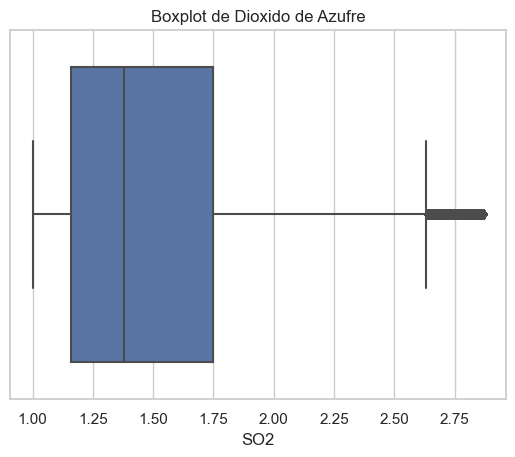

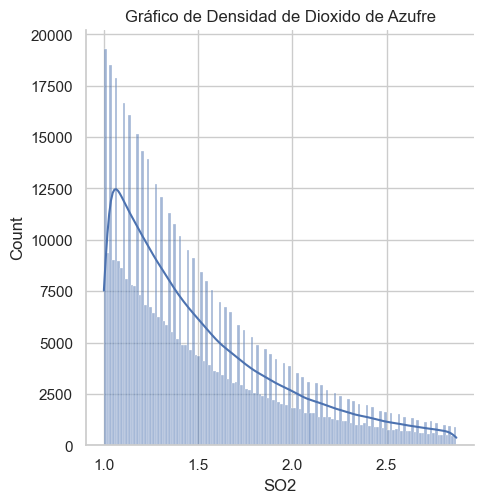

In [240]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=caire_so2['SO2'])
plt.title('Boxplot de Dioxido de Azufre')
plt.show()

sns.displot(caire_so2['SO2'], kde=True)
plt.title('Gráfico de Densidad de Dioxido de Azufre')
plt.show()

Y se puede observar que se redujo significativamente la cantidad de datos atipicos a una más reducida. Con esto, podemos continuar con el analisis de la variable.

###### Agrupación y medidas de variables

Después de verificar los datos atipicos que podemos tener, comenzamos con la agrupación de datos por Mes y Año para poder sacar el promedio y poder graficarlo a través de los 5 años el comportamiento que tiene el Dioxido de Azufre. Además de que reservamos unas variables también para la varianza, minimo y máximo.

In [242]:
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
caire_so2['fecha'] = pd.to_datetime(caire_so2['Time'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
so2_meses = caire_so2.groupby(caire_so2['fecha'].dt.to_period('M'))
so2_anos = caire_so2.groupby(caire_so2['fecha'].dt.to_period('Y'))

#VARIABLES PARA GRAFICAR
so2_avg_mes = so2_meses['SO2'].mean()
so2_avg_ano = so2_anos['SO2'].mean()
so2_varianza = caire_so2['SO2'].var()
so2_minimo = caire_so2['SO2'].min()
so2_maximo = caire_so2['SO2'].max()

print("Cantidad de Dioxido de Azufre (SO2) por mes:\n", so2_avg_mes)
print("Cantidad de Dioxido de Azufre (SO2) por año:\n", so2_avg_ano)
print("Varianza de la Dioxido de Azufre (SO2) ", so2_varianza)
print("Minimo de la Dioxido de Azufre (SO2) ", so2_minimo)
print("Maximo de la Dioxido de Azufre (SO2) ", so2_maximo)

Cantidad de Dioxido de Azufre (SO2) por mes:
 fecha
2018-10    1.401803
2018-11    1.450026
2018-12    1.605779
2019-01    1.431551
2019-02    1.396873
2019-03    1.515907
2019-04    1.401613
2019-05    1.431268
2019-06    1.419105
2019-07    1.468685
2019-08    1.486639
2019-09    1.402138
2019-10    1.454418
2019-11    1.413929
2019-12    1.378783
2020-01    1.456631
2020-02    1.442491
2020-03    1.371960
2020-04    1.442885
2020-06    1.348108
2020-07    1.399809
2020-08    1.399694
2020-09    1.473047
2020-10    1.387513
2020-11    1.426805
2020-12    1.379941
2021-01    1.484435
2021-02    1.474396
2021-03    1.436535
2021-04    1.655988
2021-05    1.588525
2021-06    1.328739
2021-07    1.439057
2021-08    1.469385
2021-09    1.458377
2021-10    1.354043
2021-11    1.414972
2021-12    1.389239
2022-01    1.401782
2022-02    1.495053
2022-03    1.699543
2022-04    1.665496
2022-05    1.739034
2022-06    1.442996
2022-07    1.495793
2022-08    1.388437
2022-09    1.309486
2022-10 

###### Gráficación de promedio del Dioxido de Azufre

Graficamos el promedio histórico del Dioxido de Azufre en los últimos 5 años por mes y año

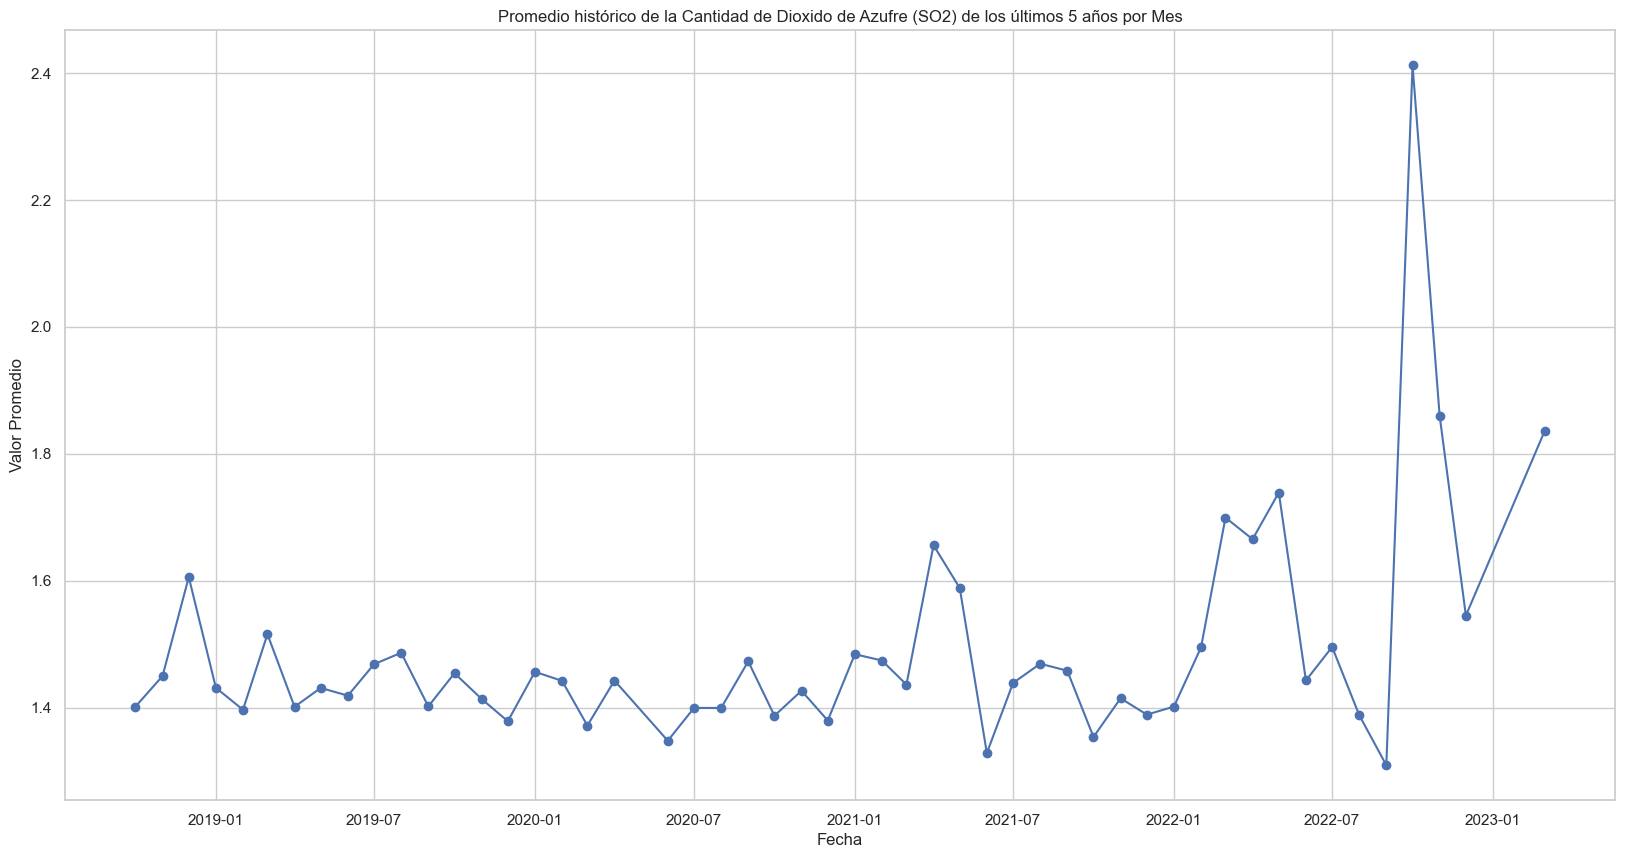

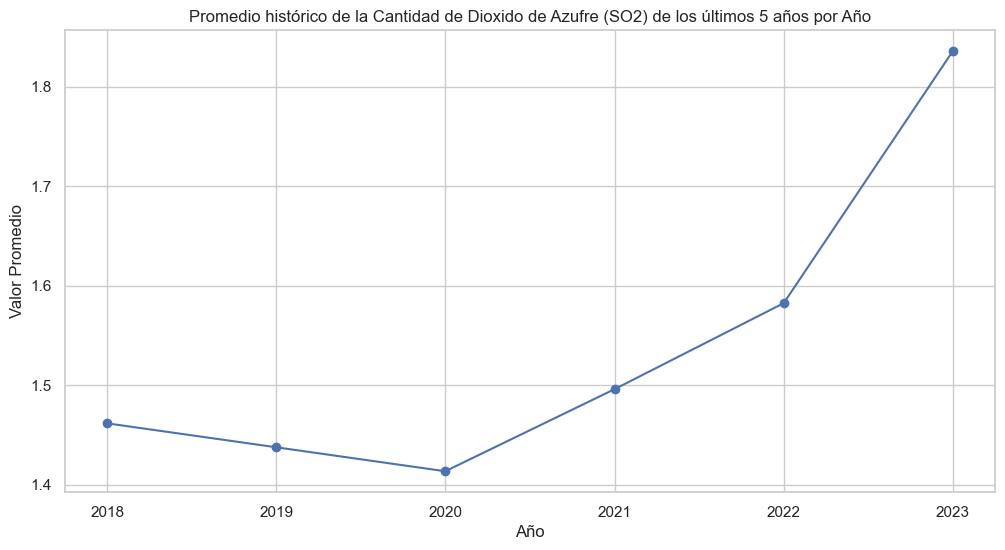

In [243]:
#GRAFICACIÓN DE 
meses = so2_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses, so2_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la Cantidad de Dioxido de Azufre (SO2) de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Crear un gráfico de líneas
ano = so2_avg_ano.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(ano, so2_avg_ano.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la Cantidad de Dioxido de Azufre (SO2) de los últimos 5 años por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


###### Varianza, Minimo y Máximo  del Dioxido de Azufre

También graficamos la varianza, el máximo y el mínimo de esta variable

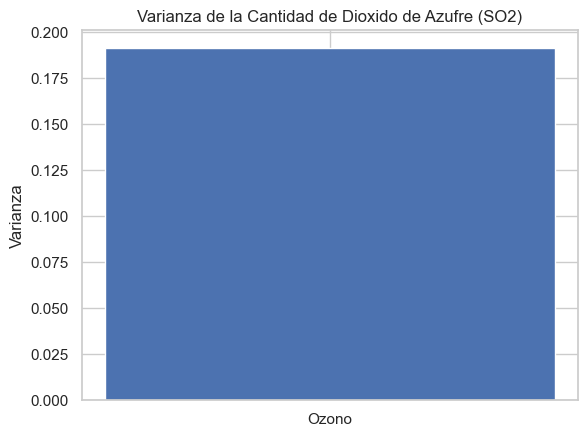

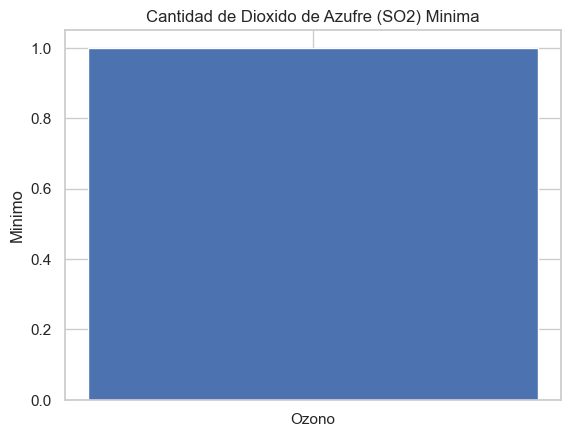

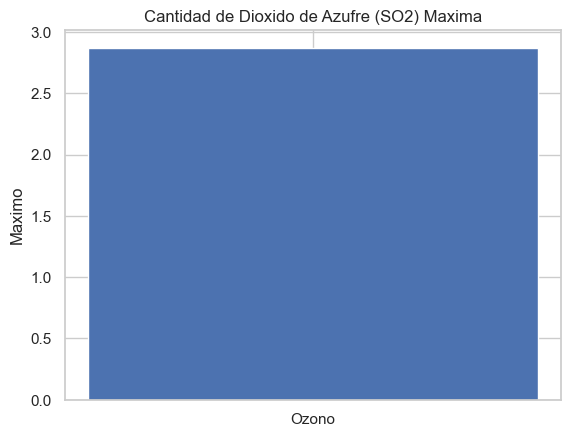

In [245]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Ozono'], [so2_varianza])
plt.title('Varianza de la Cantidad de Dioxido de Azufre (SO2)')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Ozono'], [so2_minimo])
plt.title('Cantidad de Dioxido de Azufre (SO2) Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Ozono'], [so2_maximo])
plt.title('Cantidad de Dioxido de Azufre (SO2) Maxima')
plt.ylabel('Maximo')
plt.show()

##### Dioxido de Nitrogeno

###### Detección de valores atipicos

Para detectar y graficar valores atípicos en tus datos, se puede utilizar diferentes técnicas y herramientas, pero una de las más comunes es el uso de gráficos de caja (boxplots) y cálculo de los valores atípicos utilizando umbrales basados en el rango intercuartílico (IQR). Aquí se muestra cómo se hizo con la biblioteca matplotlib y seaborn:

In [203]:
Q1 = caire_no2['NO2'].quantile(0.25)
Q3 = caire_no2['NO2'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = caire_no2[(caire_no2['NO2'] < limite_inferior) | (caire_no2['NO2'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                     Time    NO2 NO2_flag               fecha
969      01/10/2018 16:09  12.64       OK 2018-10-01 16:09:00
970      01/10/2018 16:10  11.57       OK 2018-10-01 16:10:00
973      01/10/2018 16:13  11.08       OK 2018-10-01 16:13:00
974      01/10/2018 16:14  11.39       OK 2018-10-01 16:14:00
975      01/10/2018 16:15  11.69       OK 2018-10-01 16:15:00
...                   ...    ...      ...                 ...
2624755  12/10/2023 22:47  11.62       OK 2023-10-12 22:47:00
2624756  12/10/2023 22:48  11.42       OK 2023-10-12 22:48:00
2624757  12/10/2023 22:49  11.61       OK 2023-10-12 22:49:00
2624758  12/10/2023 22:50  11.31       OK 2023-10-12 22:50:00
2624805  12/10/2023 23:37  11.36       OK 2023-10-12 23:37:00

[22763 rows x 4 columns]


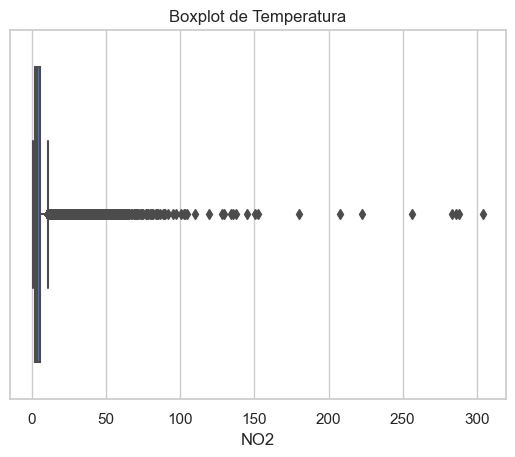

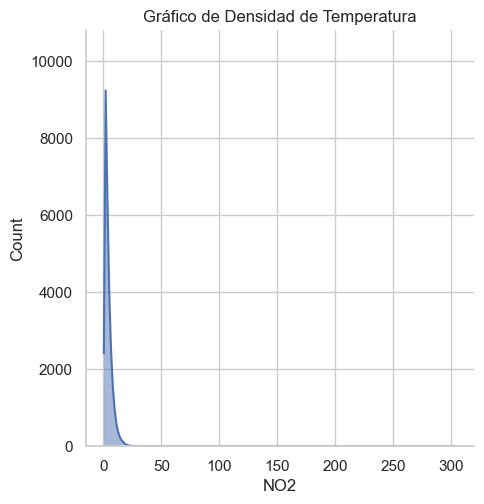

In [204]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=caire_no2['NO2'])
plt.title('Boxplot de Temperatura')
plt.show()

sns.displot(caire_no2['NO2'], kde=True)
plt.title('Gráfico de Densidad de Temperatura')
plt.show()

###### Agrupación y medidas de variables

Después de verificar los datos atipicos que podemos tener, comenzamos con la agrupación de datos por Mes y Año para poder sacar el promedio y poder graficarlo a través de los 5 años el comportamiento que tiene el Dioxido de Nitrogeno. Además de que reservamos unas variables también para la varianza, minimo y máximo.

In [201]:
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
caire_no2['fecha'] = pd.to_datetime(caire_no2['Time'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
no2_meses = caire_no2.groupby(caire_no2['fecha'].dt.to_period('M'))
no2_anos = caire_no2.groupby(caire_no2['fecha'].dt.to_period('Y'))

#VARIABLES PARA GRAFICAR
no2_avg_mes = no2_meses['NO2'].mean()
no2_avg_ano = no2_anos['NO2'].mean()
no2_varianza = caire_no2['NO2'].var()
no2_minimo = caire_no2['NO2'].min()
no2_maximo = caire_no2['NO2'].max()

print("Cantidad de Dioxido de Nitrogeno (NO2) por mes:\n", no2_avg_mes)
print("Cantidad de Dioxido de Nitrogeno (NO2) por año:\n", no2_avg_ano)
print("Varianza de la Dioxido de Nitrogeno (NO2) ", no2_varianza)
print("Minimo de la Dioxido de Nitrogeno (NO2) ", no2_minimo)
print("Maximo de la Dioxido de Nitrogeno (NO2) ", no2_maximo)

Cantidad de Dioxido de Nitrogeno (NO2) por mes:
 fecha
2018-10     4.955253
2018-11     4.296321
2018-12     5.386765
2020-08     4.189065
2020-09     4.257307
2020-10     4.055575
2020-11     3.807664
2020-12     7.222859
2022-09    14.113226
2022-10     3.733959
2022-11    27.213616
2022-12     8.378436
2023-01     9.519346
2023-02    24.670000
2023-03     4.110184
2023-04     3.240250
2023-05     4.805477
2023-06     3.425040
2023-07     4.643836
2023-08     4.344738
2023-09     4.729533
2023-10     4.240285
Freq: M, Name: NO2, dtype: float64
Cantidad de Dioxido de Nitrogeno (NO2) por año:
 fecha
2018     4.604186
2020     4.096599
2022    10.501668
2023     4.212932
Freq: A-DEC, Name: NO2, dtype: float64
Varianza de la Dioxido de Nitrogeno (NO2)  14.258772956655317
Minimo de la Dioxido de Nitrogeno (NO2)  0.4
Maximo de la Dioxido de Nitrogeno (NO2)  304.46


###### Gráficación de promedio del Dioxido de Nitrogeno

Graficamos el promedio histórico del Dioxido de Nitrogeno en los últimos 5 años por mes y año

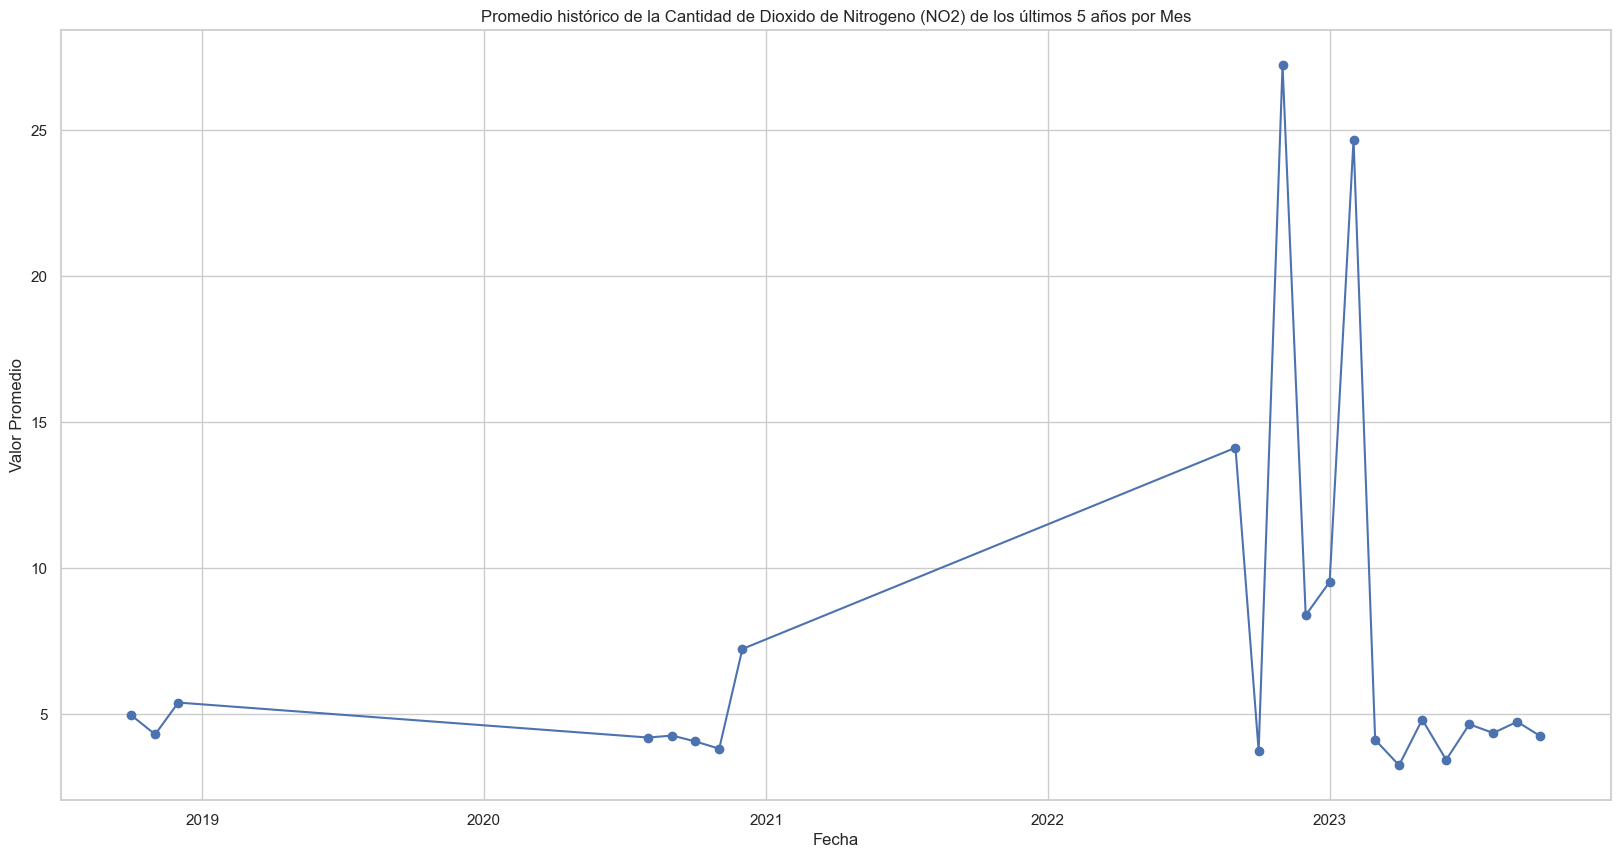

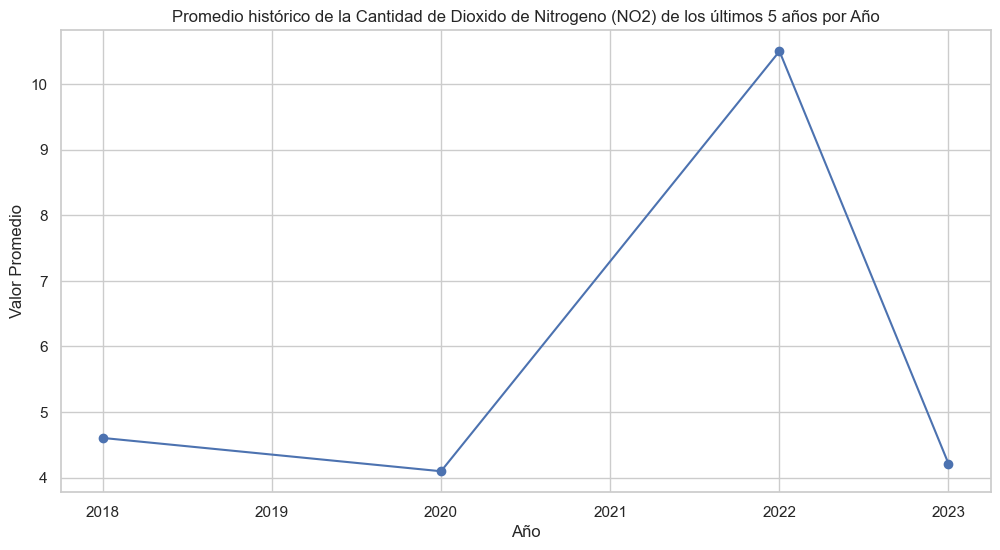

In [205]:
#GRAFICACIÓN DE 
meses = no2_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses, no2_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la Cantidad de Dioxido de Nitrogeno (NO2) de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Crear un gráfico de líneas
ano = no2_avg_ano.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(ano, no2_avg_ano.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la Cantidad de Dioxido de Nitrogeno (NO2) de los últimos 5 años por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


###### Varianza, Minimo y Máximo  del Dioxido de Nitrogeno

También graficamos la varianza, el máximo y el mínimo de esta variable

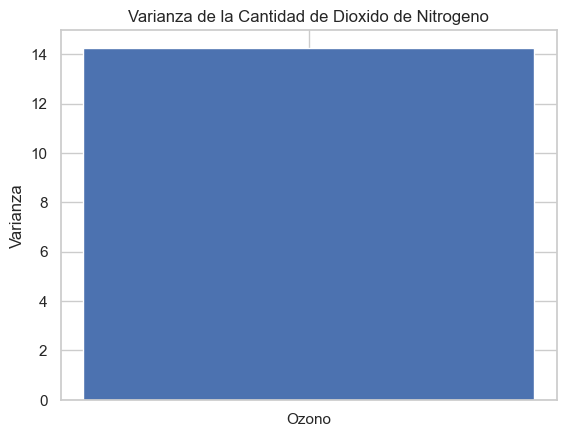

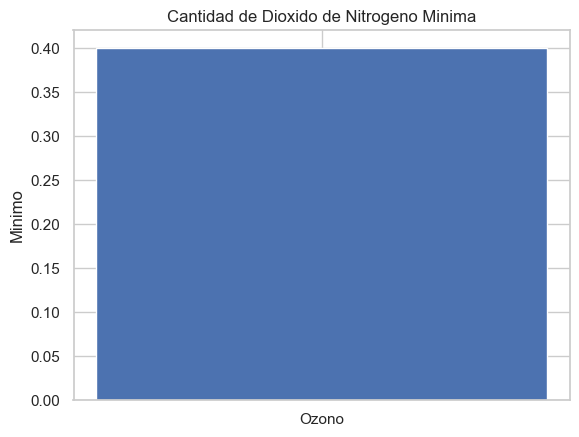

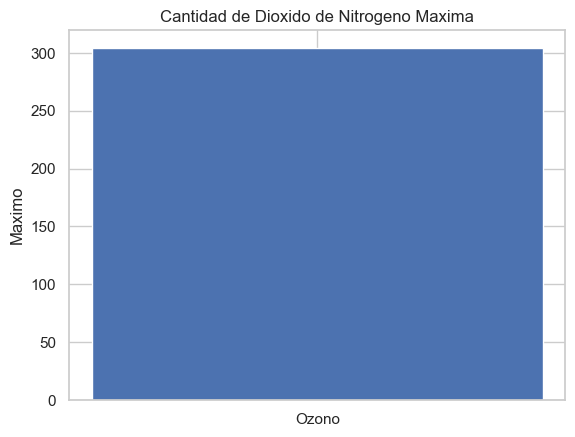

In [206]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Ozono'], [no2_varianza])
plt.title('Varianza de la Cantidad de Dioxido de Nitrogeno')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Ozono'], [no2_minimo])
plt.title('Cantidad de Dioxido de Nitrogeno Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Ozono'], [no2_maximo])
plt.title('Cantidad de Dioxido de Nitrogeno Maxima')
plt.ylabel('Maximo')
plt.show()

##### Monoxido de Carbono

###### Detección de valores atipicos

Para detectar y graficar valores atípicos en tus datos, se puede utilizar diferentes técnicas y herramientas, pero una de las más comunes es el uso de gráficos de caja (boxplots) y cálculo de los valores atípicos utilizando umbrales basados en el rango intercuartílico (IQR). Aquí se muestra cómo se hizo con la biblioteca matplotlib y seaborn:

In [265]:
Q1 = caire_co['CO'].quantile(0.25)
Q3 = caire_co['CO'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = caire_co[(caire_co['CO'] < limite_inferior) | (caire_co['CO'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                     Time    CO CO_flag
1397     01/10/2018 23:17  0.61      OK
1398     01/10/2018 23:18  0.61      OK
1399     01/10/2018 23:19  0.70      OK
1400     01/10/2018 23:20  0.70      OK
1401     01/10/2018 23:21  0.61      OK
...                   ...   ...     ...
2624710  12/10/2023 22:02  0.61      OK
2624711  12/10/2023 22:03  0.61      OK
2624725  12/10/2023 22:17  0.59      OK
2624735  12/10/2023 22:27  0.59      OK
2624736  12/10/2023 22:28  0.60      OK

[111582 rows x 3 columns]


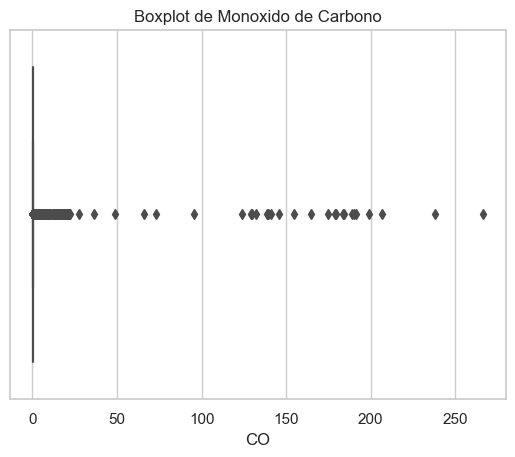

In [266]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=caire_co['CO'])
plt.title('Boxplot de Monoxido de Carbono')
plt.show()

#sns.displot(caire_co['CO'], kde=True)
#plt.title('Gráfico de Densidad de Monoxido de Carbono')
#plt.show()

Podemos ver en las gráficas anteriores, una gran cantidad de datos atipicos en este dataset, lo cual comprometería la interpretación de su información y su manipulación.
Por lo que intentaremos sacar la mayor cantidad de estos datos para llegar a una versión más confiable.  
Primero se intenta crear una versión de este dataset y lo comparamos con el original y vemos la diferencia entre estos mediante sus maximos y minimos:

In [267]:
# Filtrar los valores no atípicos
caire_co_copia = caire_co[(caire_co['CO'] >= limite_inferior) & (caire_co['CO'] <= limite_superior)]

co_minimo_original = caire_co['CO'].min()
co_maximo_original = caire_co['CO'].max()
print("CON ATIPICOS\nMinimo de Monoxido de Carbono (CO) con atipicos", co_minimo_original)
print("Maximo de la Dioxido de Monoxido de Carbono (CO) con atipicos", co_maximo_original,"\n\n")

co_minimo = caire_co_copia['CO'].min()
co_maximo = caire_co_copia['CO'].max()
print("SIN ATIPICOS\nMinimo de Monoxido de Carbono (CO) sin atipicos", co_minimo)
print("Maximo de Monoxido de Carbono (CO) sin atipicos", co_maximo)

CON ATIPICOS
Minimo de Monoxido de Carbono (CO) con atipicos 0.04
Maximo de la Dioxido de Monoxido de Carbono (CO) con atipicos 266.65 


SIN ATIPICOS
Minimo de Monoxido de Carbono (CO) sin atipicos 0.04
Maximo de Monoxido de Carbono (CO) sin atipicos 0.58


Como se puede ver en la anterior comparación, hay una gran diferencia entre los dataset. Por lo que se optará por eliminar estos datos atipicos para mejorar el analisis de esta variable. Y para comprobar eso, se realizará otro analisis de datos atipicos para comprobar la reducción de los datos atipicos:

In [268]:
#SE ELIMINAN TODOS LOS DATOS ATIPICOS DEL DATASET
caire_co = caire_co[(caire_co['CO'] >= limite_inferior) & (caire_co['CO'] <= limite_superior)]

Q1 = caire_co['CO'].quantile(0.25)
Q3 = caire_co['CO'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior  = Q1 - 1.5 * IQR
limite_superior  = Q3 + 1.5 * IQR

# Encuentra los valores atípicos
valores_atipicos = caire_co[(caire_co['CO'] < limite_inferior) | (caire_co['CO'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
                     Time    CO CO_flag
1261     01/10/2018 21:01  0.56      OK
1357     01/10/2018 22:37  0.56      OK
1407     01/10/2018 23:27  0.57      OK
1408     01/10/2018 23:28  0.56      OK
1546     02/10/2018 01:46  0.56      OK
...                   ...   ...     ...
2624731  12/10/2023 22:23  0.57      OK
2624732  12/10/2023 22:24  0.57      OK
2624733  12/10/2023 22:25  0.57      OK
2624734  12/10/2023 22:26  0.57      OK
2624737  12/10/2023 22:29  0.58      OK

[27994 rows x 3 columns]


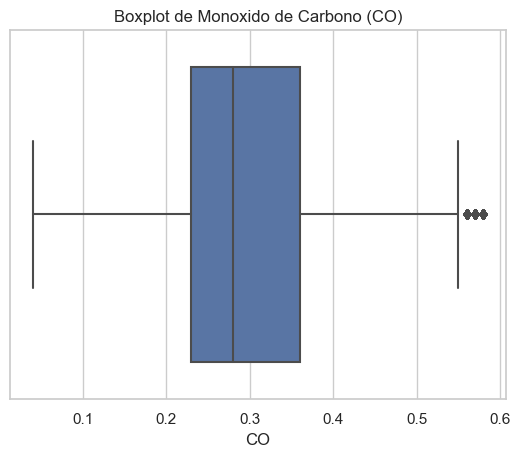

In [269]:
# Detectar valores atípicos en Temperatura
sns.boxplot(x=caire_co['CO'])
plt.title('Boxplot de Monoxido de Carbono (CO)')
plt.show()

#sns.displot(caire_co['CO'], kde=True)
#plt.title('Gráfico de Densidad de Monoxido de Carbono (CO)')
#plt.show()

Y se puede observar que se redujo significativamente la cantidad de datos atipicos a una más reducida. Con esto, podemos continuar con el analisis de la variable.

###### Agrupación y medidas de variables

Después de verificar los datos atipicos que podemos tener, comenzamos con la agrupación de datos por Mes y Año para poder sacar el promedio y poder graficarlo a través de los 5 años el comportamiento que tiene el Monoxido de Carbono. Además de que reservamos unas variables también para la varianza, minimo y máximo.

In [273]:
# Convertir la columna de fechas a tipo datetime (si aún no lo está)
caire_co['fecha'] = pd.to_datetime(caire_co['Time'], format='%d/%m/%Y %H:%M')

# Agrupar por mes
co_meses = caire_co.groupby(caire_co['fecha'].dt.to_period('M'))


#VARIABLES PARA GRAFICAR
co_avg_mes = co_meses['CO'].mean()
co_varianza = caire_co['CO'].var()
co_minimo = caire_co['CO'].min()
co_maximo = caire_co['CO'].max()

print("Cantidad de Monoxido de Carbono (CO) por mes:\n", co_avg_mes)
print("Varianza de la Cantidad de Monoxido de Carbono (CO)", co_varianza)
print("Minimo de la Cantidad de Monoxido de Carbono (CO)", co_minimo)
print("Maximo de la Cantidad de Monoxido de Carbono (CO)", co_maximo)

Cantidad de Monoxido de Carbono (CO) por mes:
 fecha
2018-10    0.180262
2018-11    0.317913
2018-12    0.367808
2019-01    0.303531
2019-02    0.262713
             ...   
2023-06    0.288959
2023-07    0.185704
2023-08    0.294097
2023-09    0.295851
2023-10    0.277693
Freq: M, Name: CO, Length: 61, dtype: float64
Varianza de la Cantidad de Monoxido de Carbono (CO) 0.010155600058148256
Minimo de la Cantidad de Monoxido de Carbono (CO) 0.04
Maximo de la Cantidad de Monoxido de Carbono (CO) 0.58


###### Gráficación de promedio del Monoxido de Carbono (CO)

Graficamos el promedio histórico del Monoxido de Carbono en los últimos 5 años por mes solamente ya que se tuvo un problema con este dataset para agruparlos por año.

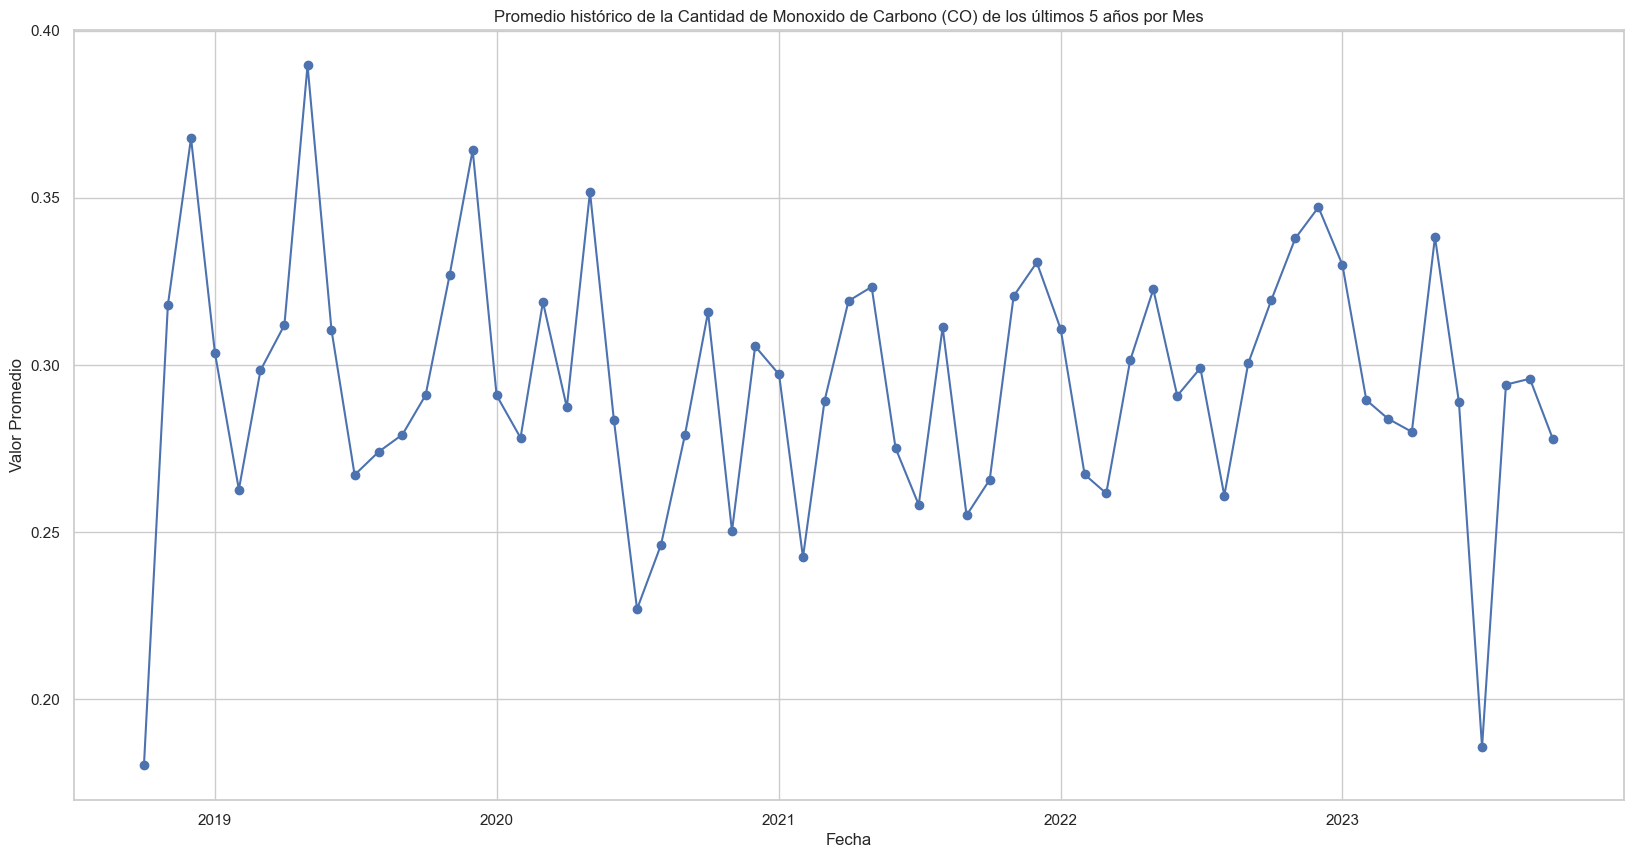

In [274]:
#GRAFICACIÓN DE 
meses = co_avg_mes.index.to_timestamp()

# Crear un gráfico de líneas
plt.figure(figsize=(20, 10))
plt.plot(meses, co_avg_mes.values, marker='o', linestyle='-')
plt.title('Promedio histórico de la Cantidad de Monoxido de Carbono (CO) de los últimos 5 años por Mes')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()


###### Varianza, Minimo y Máximo del Monoxido de Carbono (CO)

También graficamos la varianza, el máximo y el mínimo de esta variable

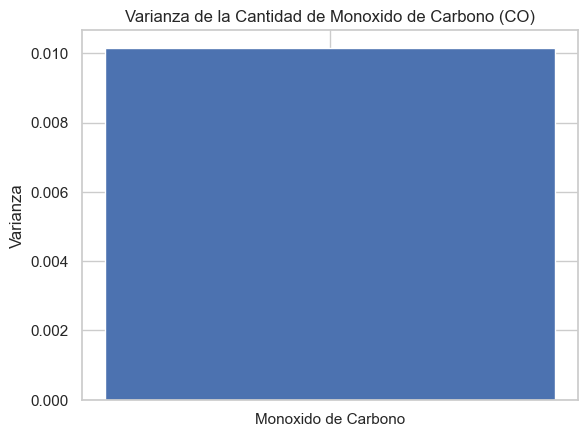

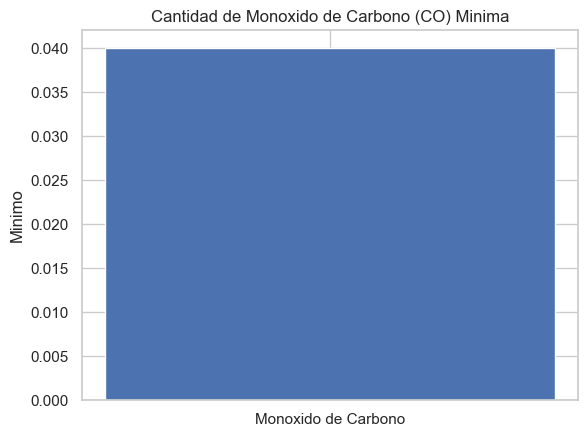

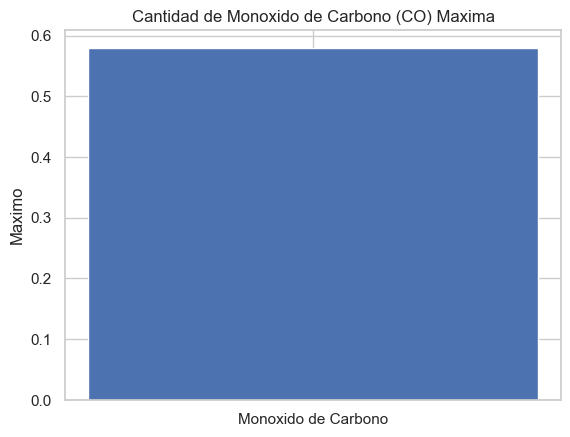

In [275]:
# Crea un gráfico de barras para visualizar la varianza
plt.bar(['Monoxido de Carbono'], [co_varianza])
plt.title('Varianza de la Cantidad de Monoxido de Carbono (CO)')
plt.ylabel('Varianza')
plt.show()

plt.bar(['Monoxido de Carbono'], [co_minimo])
plt.title('Cantidad de Monoxido de Carbono (CO) Minima')
plt.ylabel('Minimo')
plt.show()

plt.bar(['Monoxido de Carbono'], [co_maximo])
plt.title('Cantidad de Monoxido de Carbono (CO) Maxima')
plt.ylabel('Maximo')
plt.show()

## <span style="color:DarkciónBlue"> 4. Discusión</span>

En el transcurso de este proyecto, hemos abordado el como realizar web scrapping para obtener datos, limpiarlos, identificar datos atipicos y realizar el analisis de los datos a traves de Pandas y mostrarlos con gráficas. A través del análisis de datos exhaustivo y la exploración detallada de las variables metereológicas que se tenian que analizar, hemos logrado obtener una visión más profunda y significativa del clima de Morelia.

Nuestros hallazgos revelan que a pesar de ser una estación de la UNAM se tienen muchas fallas en cuanto a la captura de los datos o incluso fallas tecnicas que incluso impiden capturar dato alguno lo cual complica el analisis metereológico. Además de que hay muchos datos atipicos que se tuvieron que descartar debido a que entorpecian el analisis correcto de los dataset. A pesar de esto, se pudo encontrar que la velocidad del viento en Morelia es algo tranquilo ya que no sobrepasa normalmente los 5m/s junto a que la temperatura se ha levantado bastante incluso en las epocas de invierno con el tiempo, lo que proporciona información valiosa para el comportamiento del clima como la temperatura que en recientes años hemos sentido que ha aumentado.

Además de los hallazgos, hemos identificado áreas para posibles mejoras y consideraciones futuras. Estas incluyen el mejoramiento en cuanto al analisis de los datos atipicos debido a que no conozco mucho del tema junto a que la estación debería de vez en cuando verificar sus registros para mejorar la captura de datos y el funcionamiento de la misma estación ya que se perdieron un año de datos sobre el Ozono en Morelia lo cual es algo casi imposible de creer.

En última instancia, este proyecto fue algo retador debido a la gran cantidad de datos que se tuvieron que manejar para analizarlos ya que nunca tuve la oportunidad de obtener más de 2 millones de datos mediante el web scrapping y manipularlos para analizar, obtener estadisticas y observar su comportamiento a traves del tiempo.

## <span style="color:DarkciónBlue"> 5. Referencias</span>
### Documentos consultados (APA de preferencia)
Red Universitaria de Observatorios Atmosféricos. (2023). Unam.mx. https://www.ruoa.unam.mx/  
pandas - Python Data Analysis Library. (2023). Pydata.org. https://pandas.pydata.org/

# Fin